<p style="text-align:center;"><span style="font-size:50px;"><span style="color:DarkCyan;"><span style="font-family:cursive;"> Data preprocessing & visualization! </span> </span>  </span></p>

<div style="padding: 10px; background-color: DarkKhaki; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 100%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    <p>In this notebook i tried to have a complete preprocessing & visualization on a world universities dataset.</p>
    <p>inside the dataset we have Institution names, location and some other features.</p>
    <p>In preprocessing section, I tried to extract some coordinates for visualization.</p>
    <p>I didn't use any machine learning algorithms or models. I'm going to show you just data preprocessing and some important plots.</p>
</div>

# <div style="padding: 10px; background-color: DarkOliveGreen; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">importing libraries and data</div>

In [1]:
import pandas as pd                    
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go  # for 3d and choosing plot 
import dash                        # for select feature  plot
from dash import dcc, html         # for select feature  plot
from geopy.exc import GeocoderTimedOut # for time out in dash
from geopy.geocoders import Nominatim  # for extract Latitude and Longitude from contries name
import pycountry_convert as pc         # for geting continent name frome contry name
import pycountry                       # for getting iso name from contry names

import warnings                                 # filter some warnings
from IPython.display import display , HTML      # setting screen 

warnings.simplefilter (action = 'ignore')      

In [2]:
# importing data and make data frame
data = pd.read_csv ("eighteen_nineteen_university_datasets.csv", encoding = "unicode_escape")
df = pd.DataFrame (data)
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

# <div style="padding: 10px; background-color: DarkOliveGreen; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">PreProcessing</div>

In [3]:
df_str = pd.DataFrame (data , columns = ["Institution" , "Location"])  # split string columns for describe
df_str

Institution        Location
0                       Harvard University             USA
1                      Stanford University             USA
2    Massachusetts Institute of Technology             USA
3                  University of Cambridge  United Kingdom
4                     University of Oxford  United Kingdom
..                                     ...             ...
995                    Aga Khan University        Pakistan
996                 University of Calcutta           India
997                       K?chi University           Japan
998               Soonchunhyang University     South Korea
999              Capital Normal University           China

[1000 rows x 2 columns]

In [4]:
df.dtypes 

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education     object
Alumni Employment        object
Quality of Faculty       object
Research Output          object
Quality Publications     object
Influence                object
Citations                object
Score                   float64
dtype: object

In [5]:
list (df.columns)  

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality\xa0of Education',
 'Alumni Employment',
 'Quality\xa0of Faculty',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">two columns have problem in their names. we want to rename them to fix the problem</div>

In [6]:
df.rename(columns = {'Quality\xa0of Education':'Quality of Education' ,        
                     "Quality\xa0of Faculty" : "Quality of Faculity" }, inplace = True)

In [7]:
df.isnull().sum()        # looking for nan value

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculity     0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

<div style="padding: 10px; ; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
  There aren't any NaN values but we have some values like "-" and "> 100".
  <br>
  For this problem, you should follow these steps:
  <br>
  1. Replace "-" with NaN value.
  <br>
  2. Replace ">1000" with 1001 that means bigger than 1000 but with integer datatype for us so we can visualize.
</div>

In [8]:
df_p1 = df.replace (["-"] , np.nan)        
df_p1

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculity  \
0                1                    2                 1                   1   
1                2                   10                 3                   2   
2                3                    3                11                   3   
3                1                    5                19                   6   
4                2                    9                25                  10   
..             ...                  ...               ...                 ...   
995              3                  NaN            > 1000                 NaN   
996             17                  353               716                 296   
997             56                  NaN            > 1000                 NaN   
998             35                  NaN            > 1000                 NaN   
999            108                  NaN               869                 NaN   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

In [9]:
df_p1.isnull().sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education    597
Alumni Employment         0
Quality of Faculity     731
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

In [10]:
df_p2 = df_p1.replace (['> 1000'] , 1001)
df_p2

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculity  \
0                1                    2                 1                   1   
1                2                   10                 3                   2   
2                3                    3                11                   3   
3                1                    5                19                   6   
4                2                    9                25                  10   
..             ...                  ...               ...                 ...   
995              3                  NaN              1001                 NaN   
996             17                  353               716                 296   
997             56                  NaN              1001                 NaN   
998             35                  NaN              1001                 NaN   
999            108                  NaN               869                 NaN   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995            1001                 1001       464       673   69.8  
996             798                  966      1001      1001   69.8  
997            1001                 1001       811       673   69.8  
998             881                 1001      1001       898   69.8  
999             923                  904       889      1001   69.8  

[1000 rows x 12 columns]

In [11]:
df_p2.dtypes

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education     object
Alumni Employment        object
Quality of Faculity      object
Research Output          object
Quality Publications     object
Influence                object
Citations                object
Score                   float64
dtype: object

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Data type of some numeric columns are 'object' we need to trasnform them to 'float'</div>

In [12]:
for col in df_p2.columns :            # i made a loop with a condition for this          
    if (df_p2[col].dtypes == "object") and ( col != "Location") and (col != "Institution") :
        df_p2[col] = df_p2[col].astype ("float" )

In [13]:
df_p2.dtypes

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education    float64
Alumni Employment       float64
Quality of Faculity     float64
Research Output         float64
Quality Publications    float64
Influence               float64
Citations               float64
Score                   float64
dtype: object

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">for handle '-' values we put max value of their column + 1 just for having visualization and dont miss many rows </div>

In [14]:
print (df_p2 ["Quality of Education"].nlargest (5))
print (df_p2 ["Quality of Faculity"].nlargest (5))

448    666.0
573    664.0
400    662.0
923    661.0
402    659.0
Name: Quality of Education, dtype: float64
379    303.0
263    300.0
365    300.0
316    299.0
122    298.0
Name: Quality of Faculity, dtype: float64


In [15]:
df_p2 ["Quality of Education"] = df_p2 ["Quality of Education"].replace (np.nan , 667)
df_p2 ["Quality of Faculity"] = df_p2 ["Quality of Faculity"].replace (np.nan , 304)

In [16]:
df_p2.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculity     0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">now we can describe our columns </div>

In [17]:
df_p2.describe ().T

count      mean         std   min     25%      50%  \
World Rank            1000.0  500.5000  288.819436   1.0  250.75   500.50   
National Rank         1000.0   40.0230   49.228710   1.0    6.00    21.00   
Quality of Education  1000.0  528.5320  208.781322   1.0  405.75   667.00   
Alumni Employment     1000.0  726.5280  343.686144   1.0  425.75  1001.00   
Quality of Faculity   1000.0  261.1800   84.233419   1.0  282.75   304.00   
Research Output       1000.0  508.4540  300.080433   1.0  250.75   500.50   
Quality Publications  1000.0  503.0030  292.854863   1.0  250.75   500.50   
Influence             1000.0  529.1560  322.419239   1.0  250.75   502.50   
Citations             1000.0  501.1590  308.874517   1.0  240.00   460.00   
Score                 1000.0   75.0343    4.670858  69.8   71.50    73.75   

                          75%     max  
World Rank             750.25  1000.0  
National Rank           51.00   213.0  
Quality of Education   667.00   667.0  
Alumni Employment     1001.00  1001.0  
Quality of Faculity    304.00   304.0  
Research Output        754.25  1001.0  
Quality Publications   750.25  1001.0  
Influence              814.75  1001.0  
Citations              673.00  1001.0  
Score                   77.30   100.0

In [18]:
df_str.describe().T

count unique                 top freq
Institution  1000   1000  Harvard University    1
Location     1000     61                 USA  213

<div style="padding: 10px; ; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
we want longitude _ latitude _ continent name_ISO for map plot and better visualization
  <br>
  so we should extract all of these from institution and country name  with different libraries 
</div>

In [19]:
dfL = df.copy ()

In [20]:
# extracting Longitude and Latitude form institution name 
# some of institution names give us nan value so we put a condition that give us coordinates from country name 
geolocator = Nominatim (user_agent = "hameddlv24" , timeout = 10)

def geocode_Location (row):
    Location = geolocator.geocode (row ['Location'])
    Institution = geolocator.geocode (row ['Institution'])

    if Institution is not None:
        return pd.Series ({'Latitude' : Institution.latitude , 'Longitude' : Institution.longitude})
    else:
        return pd.Series ({'Latitude' : Location.latitude , 'Longitude' : Location.longitude})


dfL [['Latitude' , 'Longitude']] = dfL.apply (lambda row : geocode_Location (row) , axis = 1)

In [21]:
dfL.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculity     0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
Latitude                0
Longitude               0
dtype: int64

In [22]:
# getting continent name by country name
def country_to_continent (country_name):
    try:
        country_code = pc.country_name_to_country_alpha2 (country_name , cn_name_format = "default")  # get country code
        continent_code = pc.country_alpha2_to_continent_code (country_code)                           # get continent code
        continent_name = pc.convert_continent_code_to_continent_name (continent_code)                 # get continent name
        return continent_name 
    except:
        return np.nan 

dfL ['Continent'] = dfL ['Location'].apply (country_to_continent)
dfL

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculity  \
0                1                    2                 1                   1   
1                2                   10                 3                   2   
2                3                    3                11                   3   
3                1                    5                19                   6   
4                2                    9                25                  10   
..             ...                  ...               ...                 ...   
995              3                    -            > 1000                   -   
996             17                  353               716                 296   
997             56                    -            > 1000                   -   
998             35                    -            > 1000                   -   
999            108                    -               869                   -   

    Research Output Quality Publications Influence Citations  Score  \
0                 1                    1         1         1  100.0   
1                10                    4         3         2   96.7   
2                30                   15         2         6   95.1   
3                12                    8         6        19   94.0   
4                 9                    5         7         4   93.2   
..              ...                  ...       ...       ...    ...   
995          > 1000               > 1000       464       673   69.8   
996             798                  966    > 1000    > 1000   69.8   
997          > 1000               > 1000       811       673   69.8   
998             881               > 1000    > 1000       898   69.8   
999             923                  904       889    > 1000   69.8   

      Latitude   Longitude      Continent  
0    42.367909  -71.126782  North America  
1    37.431314 -122.169365  North America  
2    42.358253  -71.096627  North America  
3    52.210946    0.092005         Europe  
4    51.758708   -1.255668         Europe  
..         ...         ...            ...  
995  -3.356400   36.605376           Asia  
996  22.484733   88.344753           Asia  
997  35.700021  139.741651           Asia  
998  36.769988  126.931634           Asia  
999  39.928866  116.300055           Asia  

[1000 rows x 15 columns]

In [23]:
dfL.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculity     0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
Latitude                0
Longitude               0
Continent               0
dtype: int64

In [24]:
# a function to convert country name to ISO code
def country_to_isocode (country):
    try:
        return pycountry.countries.get (name = country).alpha_3
    except:
        return np.nan 

# putting result in a column
dfL['ISO_Loc'] = dfL['Location'].apply(country_to_isocode)
dfL

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculity  \
0                1                    2                 1                   1   
1                2                   10                 3                   2   
2                3                    3                11                   3   
3                1                    5                19                   6   
4                2                    9                25                  10   
..             ...                  ...               ...                 ...   
995              3                    -            > 1000                   -   
996             17                  353               716                 296   
997             56                    -            > 1000                   -   
998             35                    -            > 1000                   -   
999            108                    -               869                   -   

    Research Output Quality Publications Influence Citations  Score  \
0                 1                    1         1         1  100.0   
1                10                    4         3         2   96.7   
2                30                   15         2         6   95.1   
3                12                    8         6        19   94.0   
4                 9                    5         7         4   93.2   
..              ...                  ...       ...       ...    ...   
995          > 1000               > 1000       464       673   69.8   
996             798                  966    > 1000    > 1000   69.8   
997          > 1000               > 1000       811       673   69.8   
998             881               > 1000    > 1000       898   69.8   
999             923                  904       889    > 1000   69.8   

      Latitude   Longitude      Continent ISO_Loc  
0    42.367909  -71.126782  North America     NaN  
1    37.431314 -122.169365  North America     NaN  
2    42.358253  -71.096627  North America     NaN  
3    52.210946    0.092005         Europe     GBR  
4    51.758708   -1.255668         Europe     GBR  
..         ...         ...            ...     ...  
995  -3.356400   36.605376           Asia     PAK  
996  22.484733   88.344753           Asia     IND  
997  35.700021  139.741651           Asia     JPN  
998  36.769988  126.931634           Asia     NaN  
999  39.928866  116.300055           Asia     CHN  

[1000 rows x 16 columns]

In [25]:
dfL.isnull().sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education      0
Alumni Employment         0
Quality of Faculity       0
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
Latitude                  0
Longitude                 0
Continent                 0
ISO_Loc                 289
dtype: int64

In [26]:
 # looking for countries that have problem in their name that our function doesnt work on them
df_nan = dfL [dfL.isna().any (axis = 1)]  
df_nan ["Location"].unique ()

array(['USA', 'South Korea', 'Taiwan', 'Russia', 'Czech Republic', 'Iran',
       'Slovak Republic', 'Macau'], dtype=object)

In [27]:
# change their names to the right format
country_mapping = {
    "USA": "United States",
    "South Korea": "Korea, Republic of",
    "Taiwan": "Taiwan, Province of China",
    "Russia": "Russian Federation",
    "Czech Republic": "Czechia",
    "Iran": "Iran, Islamic Republic of",
    "Slovak Republic": "Slovakia",
    "Macau": "Macao"
}
dfL ['Location'] = dfL ['Location'].replace(country_mapping)

In [28]:
# again convert country name to ISO code
def country_to_isocode (country):
    try:
        return pycountry.countries.get (name = country).alpha_3
    except:
        return np.nan 


dfL ['ISO_Loc'] = dfL ['Location'].apply (country_to_isocode)
dfL

World Rank                            Institution            Location  \
0             1                     Harvard University       United States   
1             2                    Stanford University       United States   
2             3  Massachusetts Institute of Technology       United States   
3             4                University of Cambridge      United Kingdom   
4             5                   University of Oxford      United Kingdom   
..          ...                                    ...                 ...   
995         996                    Aga Khan University            Pakistan   
996         997                 University of Calcutta               India   
997         998                       K?chi University               Japan   
998         999               Soonchunhyang University  Korea, Republic of   
999        1000              Capital Normal University               China   

     National Rank Quality of Education Alumni Employment Quality of Faculity  \
0                1                    2                 1                   1   
1                2                   10                 3                   2   
2                3                    3                11                   3   
3                1                    5                19                   6   
4                2                    9                25                  10   
..             ...                  ...               ...                 ...   
995              3                    -            > 1000                   -   
996             17                  353               716                 296   
997             56                    -            > 1000                   -   
998             35                    -            > 1000                   -   
999            108                    -               869                   -   

    Research Output Quality Publications Influence Citations  Score  \
0                 1                    1         1         1  100.0   
1                10                    4         3         2   96.7   
2                30                   15         2         6   95.1   
3                12                    8         6        19   94.0   
4                 9                    5         7         4   93.2   
..              ...                  ...       ...       ...    ...   
995          > 1000               > 1000       464       673   69.8   
996             798                  966    > 1000    > 1000   69.8   
997          > 1000               > 1000       811       673   69.8   
998             881               > 1000    > 1000       898   69.8   
999             923                  904       889    > 1000   69.8   

      Latitude   Longitude      Continent ISO_Loc  
0    42.367909  -71.126782  North America     USA  
1    37.431314 -122.169365  North America     USA  
2    42.358253  -71.096627  North America     USA  
3    52.210946    0.092005         Europe     GBR  
4    51.758708   -1.255668         Europe     GBR  
..         ...         ...            ...     ...  
995  -3.356400   36.605376           Asia     PAK  
996  22.484733   88.344753           Asia     IND  
997  35.700021  139.741651           Asia     JPN  
998  36.769988  126.931634           Asia     KOR  
999  39.928866  116.300055           Asia     CHN  

[1000 rows x 16 columns]

In [29]:
dfL.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculity     0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
Latitude                0
Longitude               0
Continent               0
ISO_Loc                 0
dtype: int64

# <div style="padding: 10px; background-color: DarkOliveGreen; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Visualization</div>

In [30]:
df = df_p2.copy()

In [31]:
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                   2.0                1.0   
1                2                  10.0                3.0   
2                3                   3.0               11.0   
3                1                   5.0               19.0   
4                2                   9.0               25.0   
..             ...                   ...                ...   
995              3                 667.0             1001.0   
996             17                 353.0              716.0   
997             56                 667.0             1001.0   
998             35                 667.0             1001.0   
999            108                 667.0              869.0   

     Quality of Faculity  Research Output  Quality Publications  Influence  \
0                    1.0              1.0                   1.0        1.0   
1                    2.0             10.0                   4.0        3.0   
2                    3.0             30.0                  15.0        2.0   
3                    6.0             12.0                   8.0        6.0   
4                   10.0              9.0                   5.0        7.0   
..                   ...              ...                   ...        ...   
995                304.0           1001.0                1001.0      464.0   
996                296.0            798.0                 966.0     1001.0   
997                304.0           1001.0                1001.0      811.0   
998                304.0            881.0                1001.0     1001.0   
999                304.0            923.0                 904.0      889.0   

     Citations  Score  
0          1.0  100.0  
1          2.0   96.7  
2          6.0   95.1  
3         19.0   94.0  
4          4.0   93.2  
..         ...    ...  
995      673.0   69.8  
996     1001.0   69.8  
997      673.0   69.8  
998      898.0   69.8  
999     1001.0   69.8  

[1000 rows x 12 columns]

<div style="padding: 10px; ; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;"></div>

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Scatter plots</div>

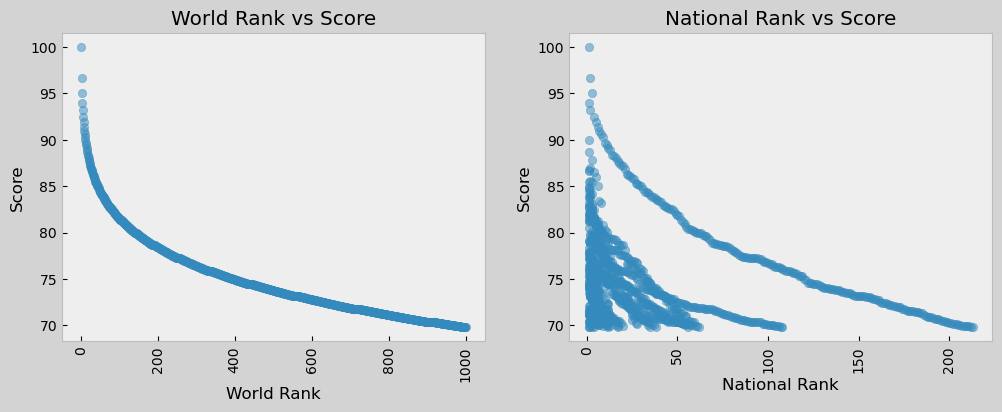

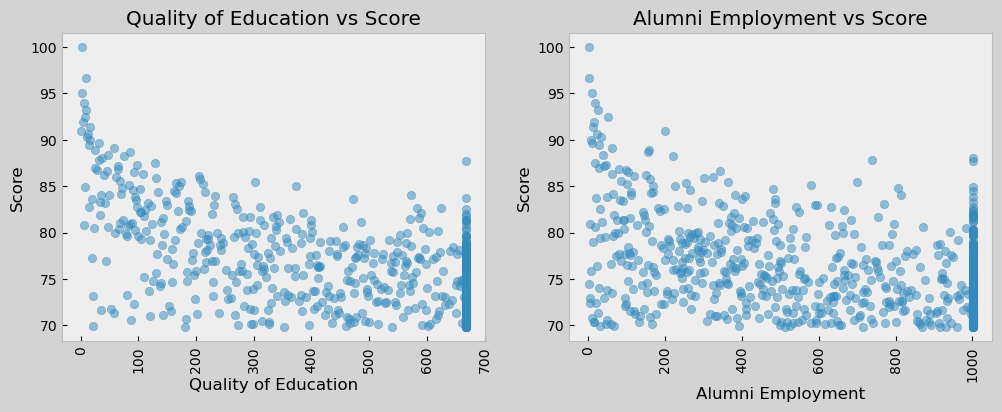

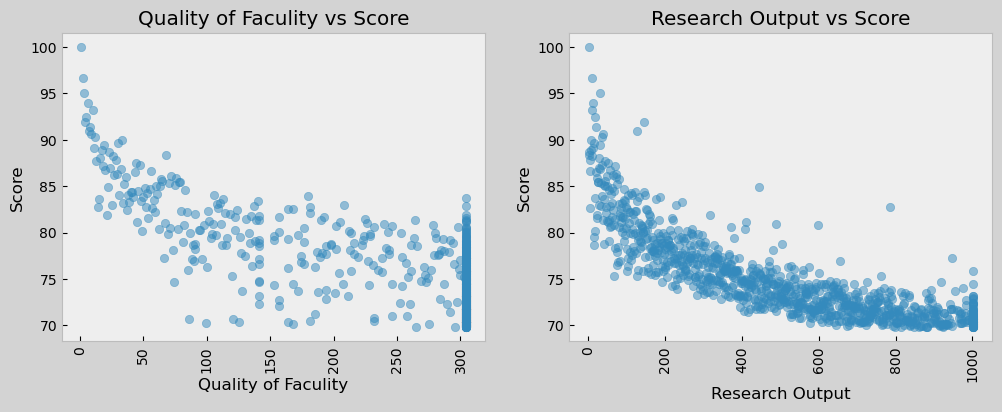

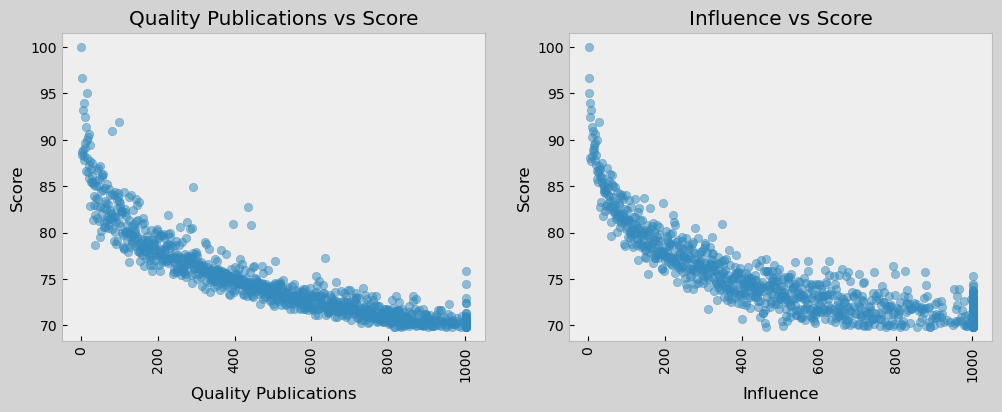

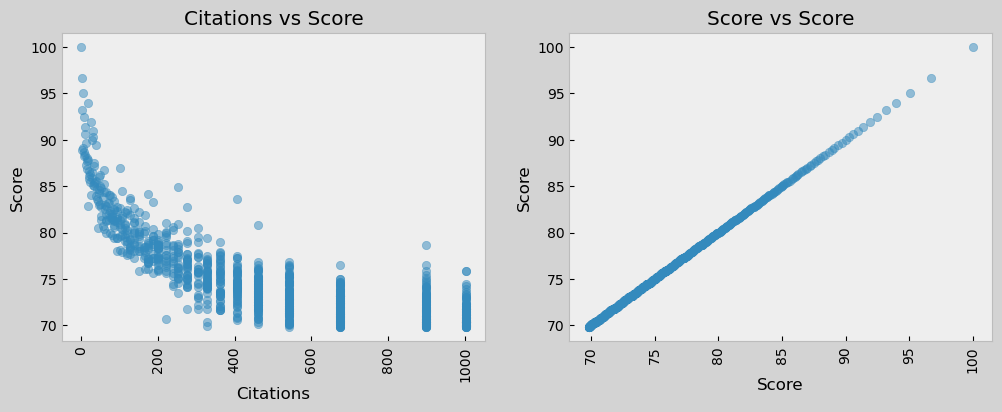

In [32]:
# a loop for getting scatter plot of all columns but Institution with score column that is also for checking noise 
plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.style.use("bmh")
scatter_plot = list (df.drop (['Institution' , 'Location'] , axis = 1))               
i =  0
while i < 10:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df [scatter_plot [i]] , df ["Score"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs Score")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("Score")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df [scatter_plot [i]] , df ["Score"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs Score")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("Score")
    plt.grid ()
    i += 1
    plt.show ()

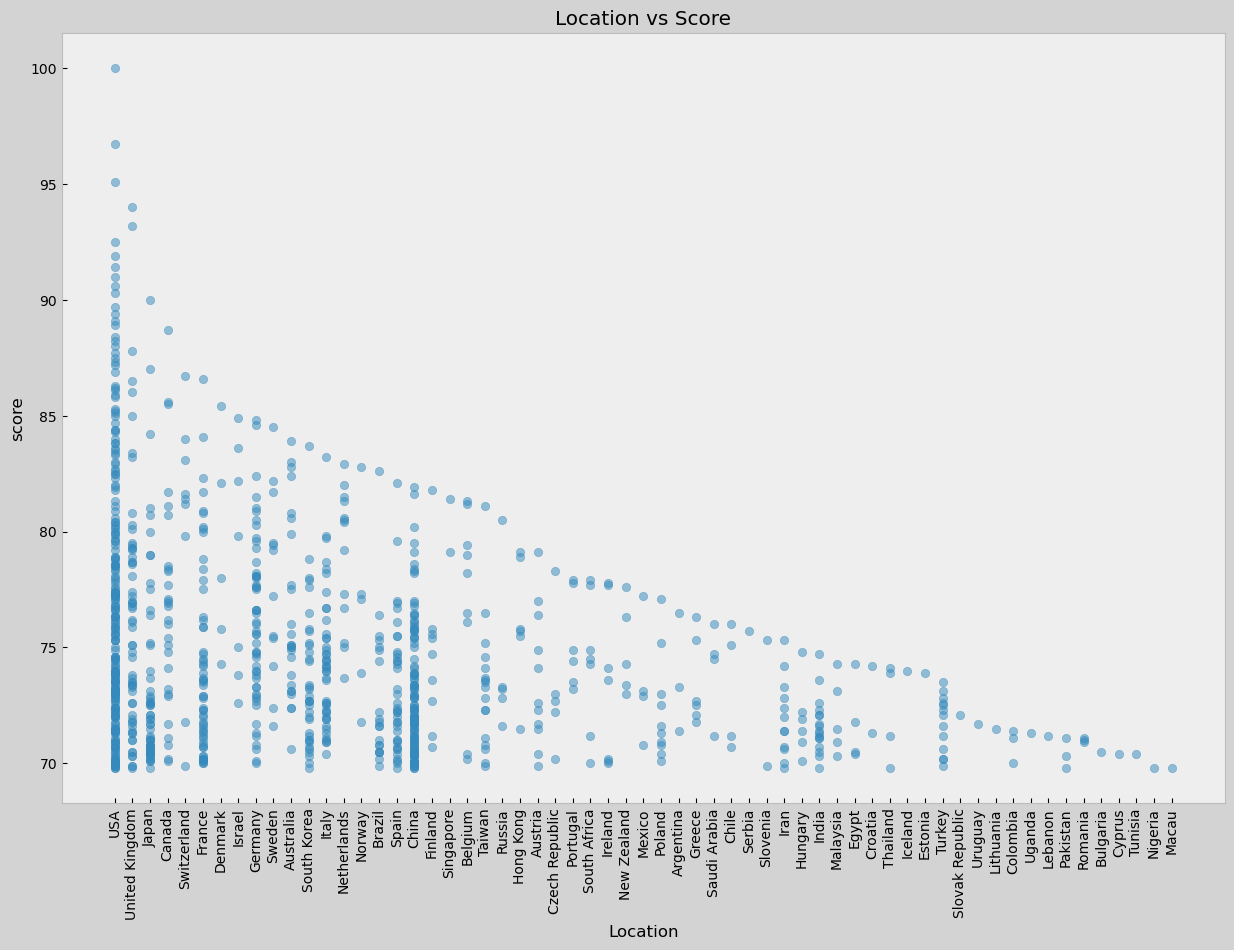

In [33]:
plt.figure (figsize = (15 , 10))
plt.scatter (df ['Location'] , df ["Score"] , alpha = .5)
plt.title ("Location vs Score")
plt.xlabel ('Location')
plt.xticks (rotation = 90)
plt.ylabel ("score")
plt.grid ()
plt.show ()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Bar plots</div>

In [34]:
df_Num = pd.DataFrame (dfL ['Location'].value_counts ().reset_index ())
df_Num

index  Location
0    United States       213
1            China       108
2   United Kingdom        62
3           France        58
4            Japan        56
..             ...       ...
56         Uruguay         1
57        Slovakia         1
58         Estonia         1
59         Iceland         1
60           Macao         1

[61 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

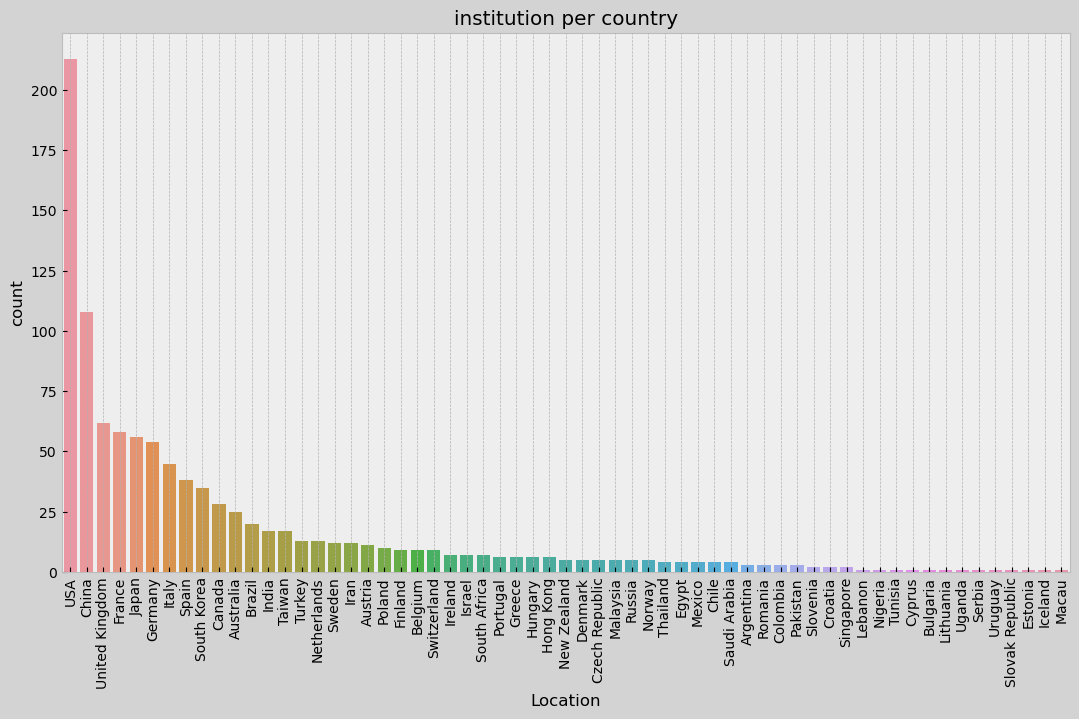

In [35]:
# count plot for checking nimber of universities in countries
plt.figure (figsize = (13 , 7)) 
counts_order = df['Location'].value_counts().index
sns.countplot (df["Location"] , order = counts_order )
plt.title ("institution per country")
plt.xticks (rotation = 90)
plt.grid ()
plt.show
#plt.savefig ('C:Desktop/count.png' , orientation ='landscape' , bbox_inches ="tight")

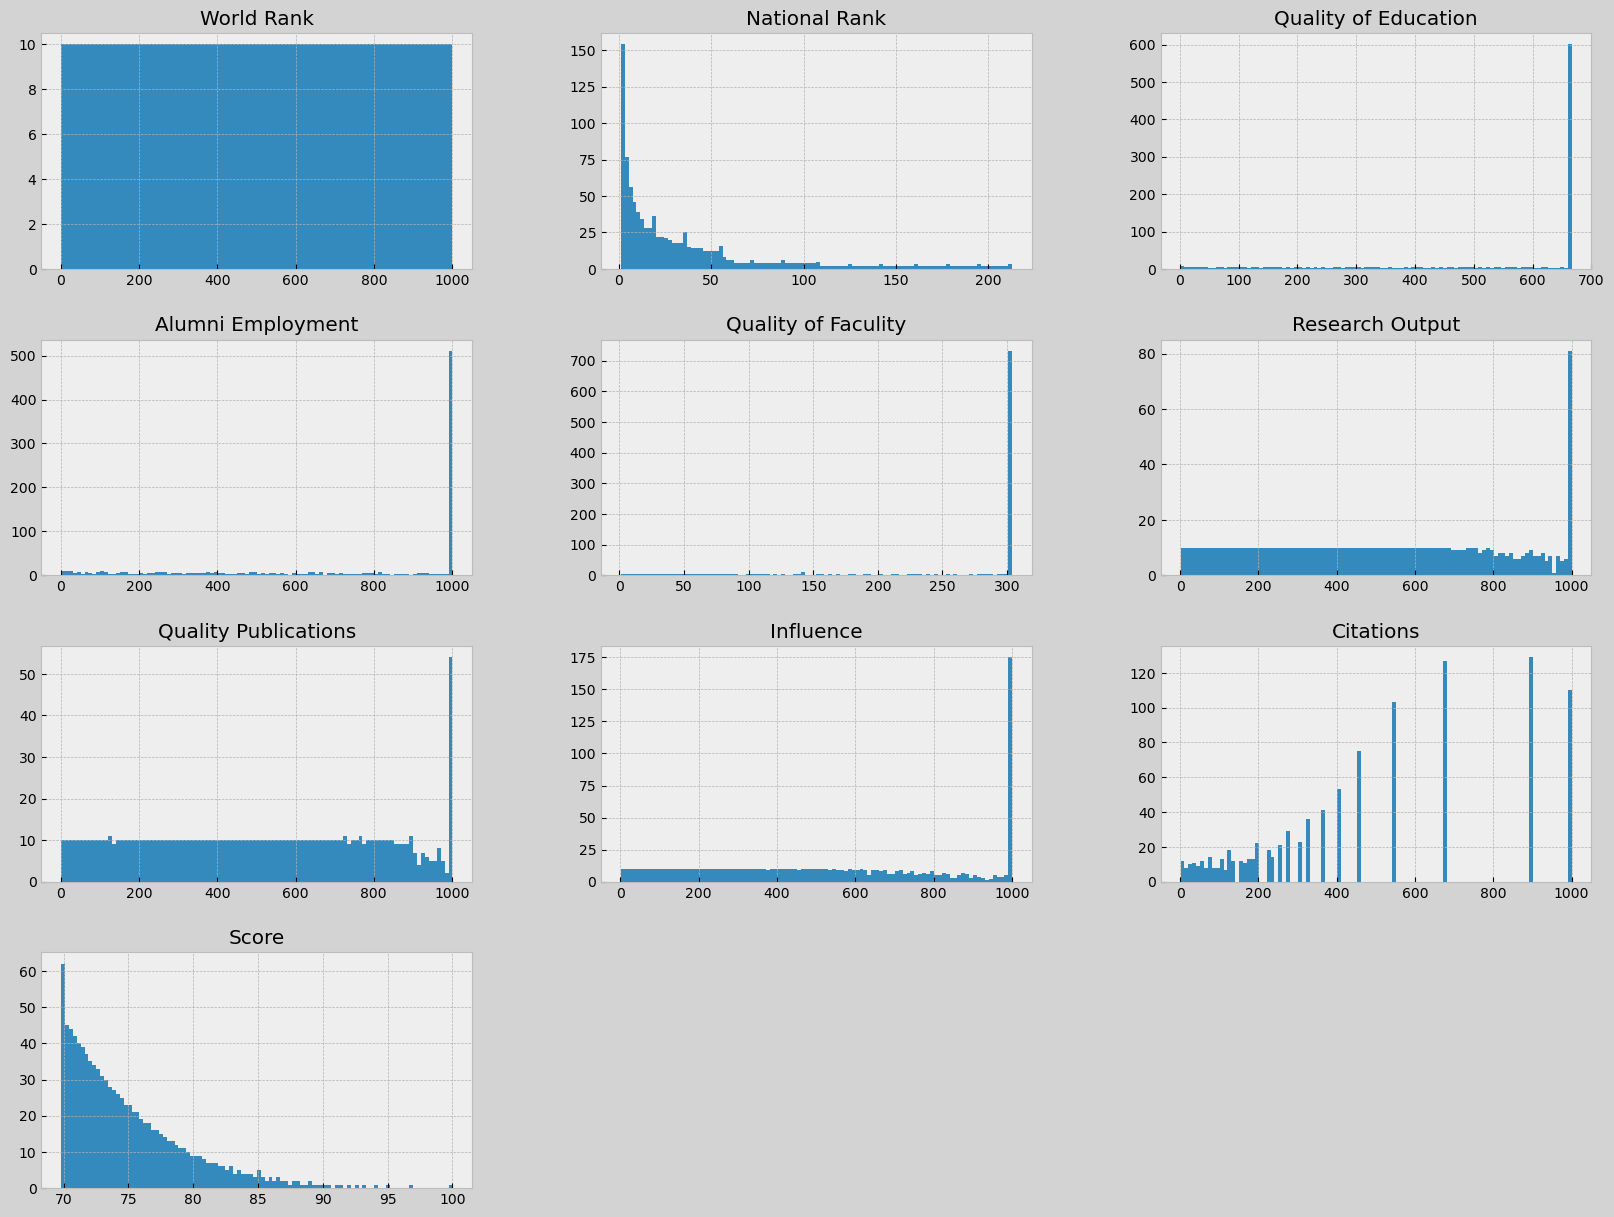

In [36]:
# hist plot of all columns for view data distribution 
df.hist ( bins = 100 , figsize = (20 , 15))
plt.show()

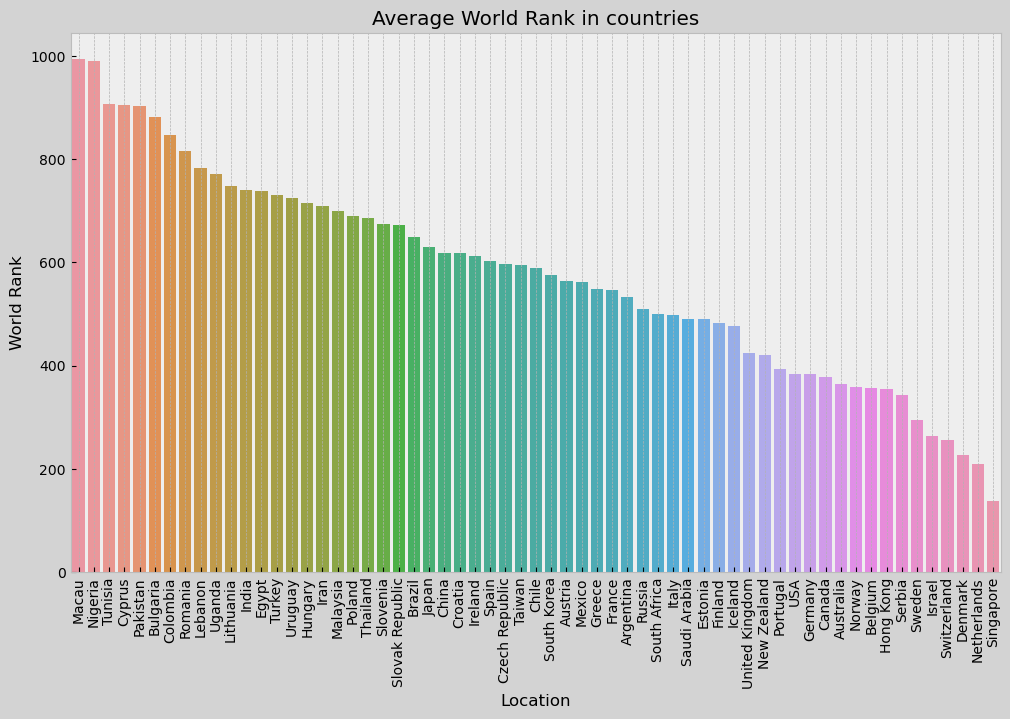

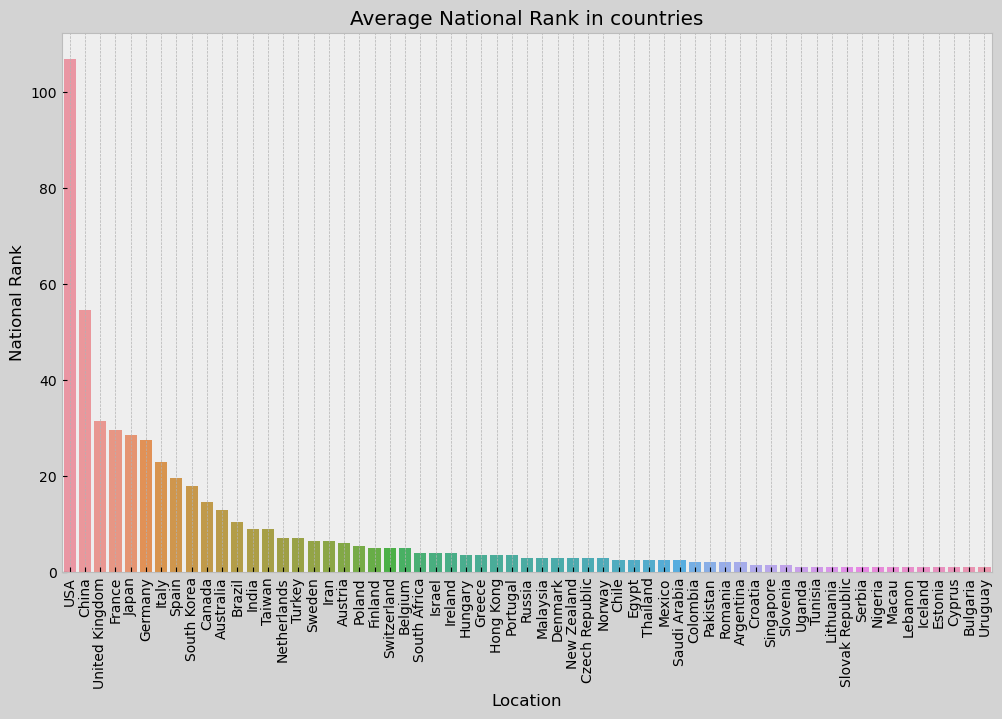

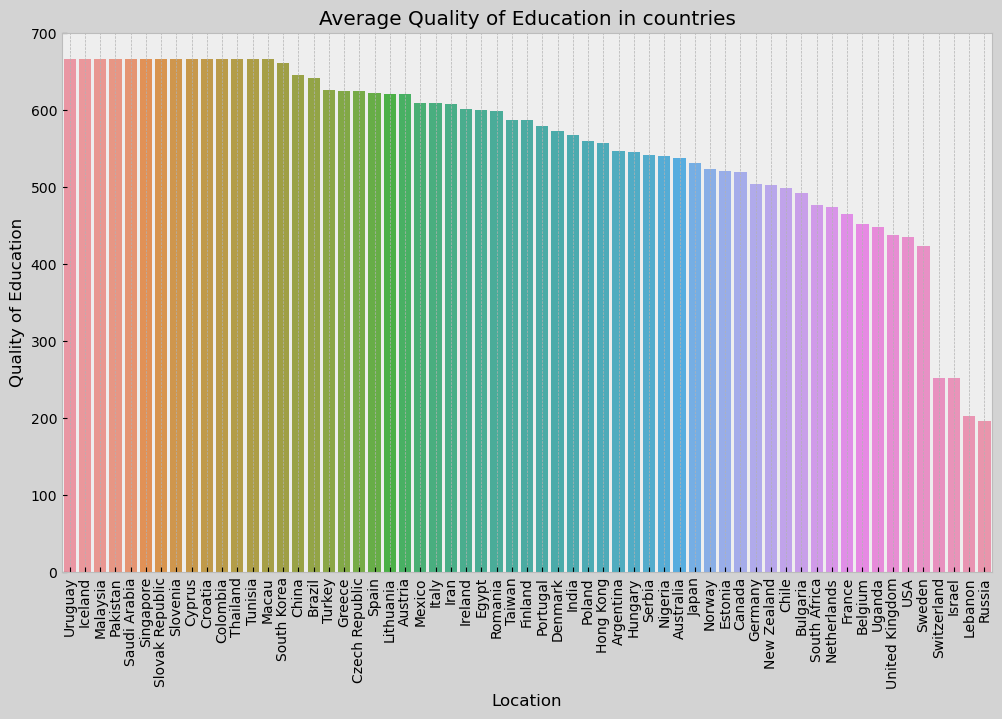

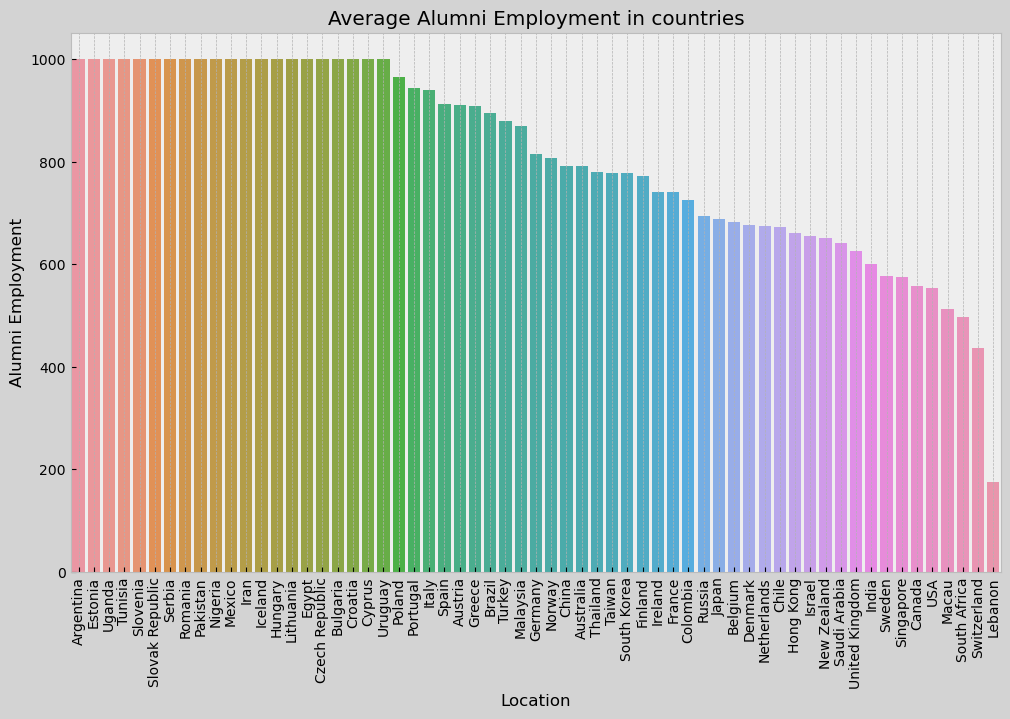

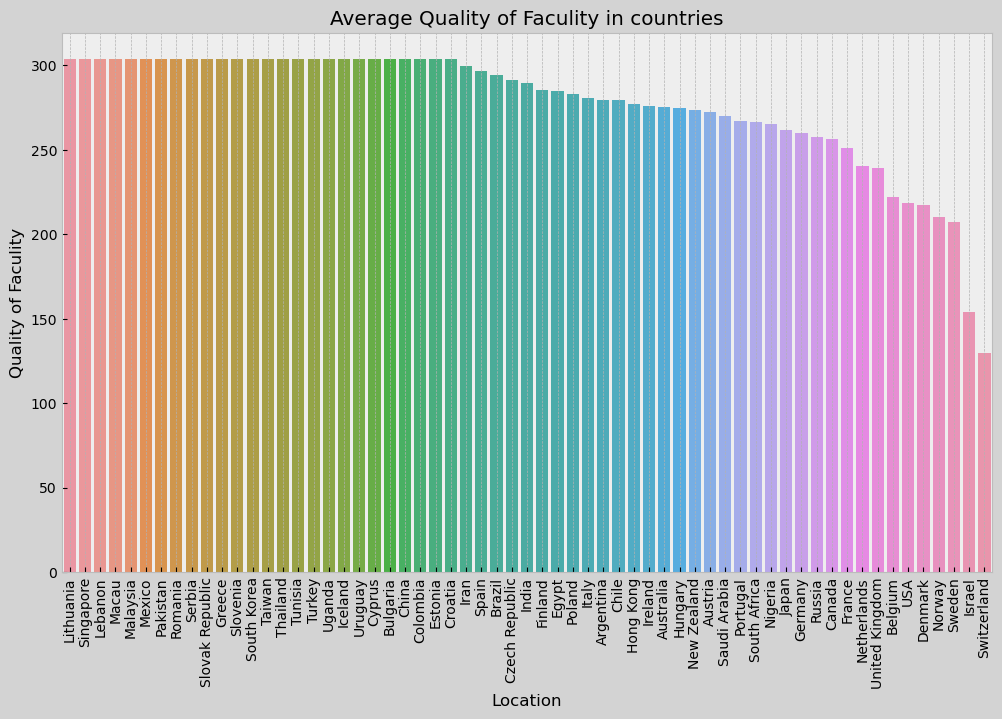

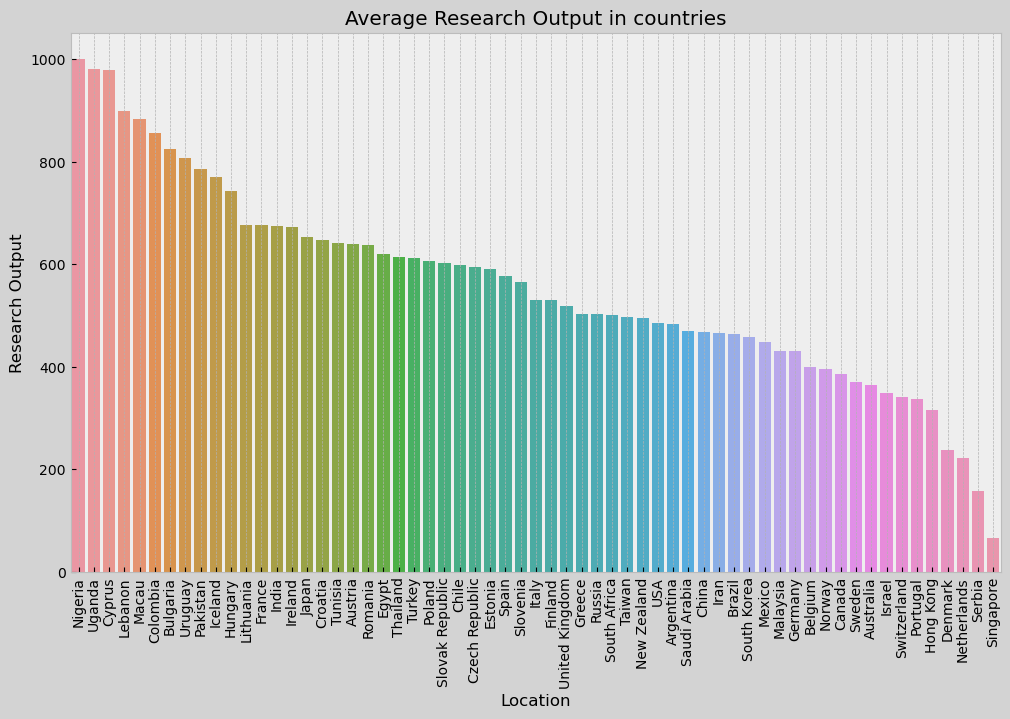

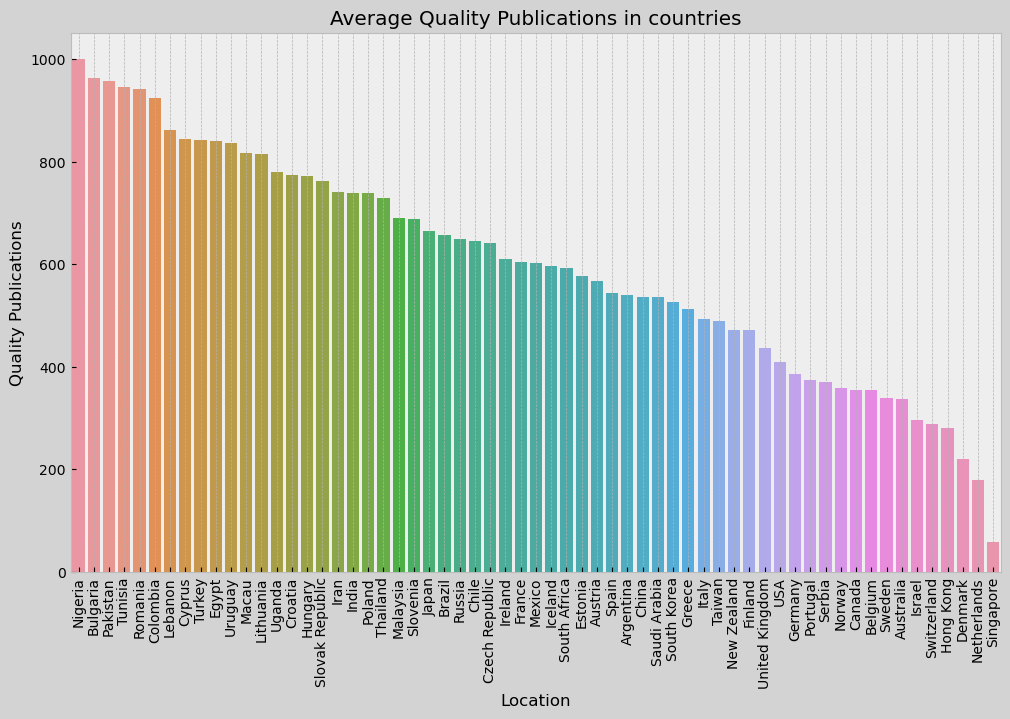

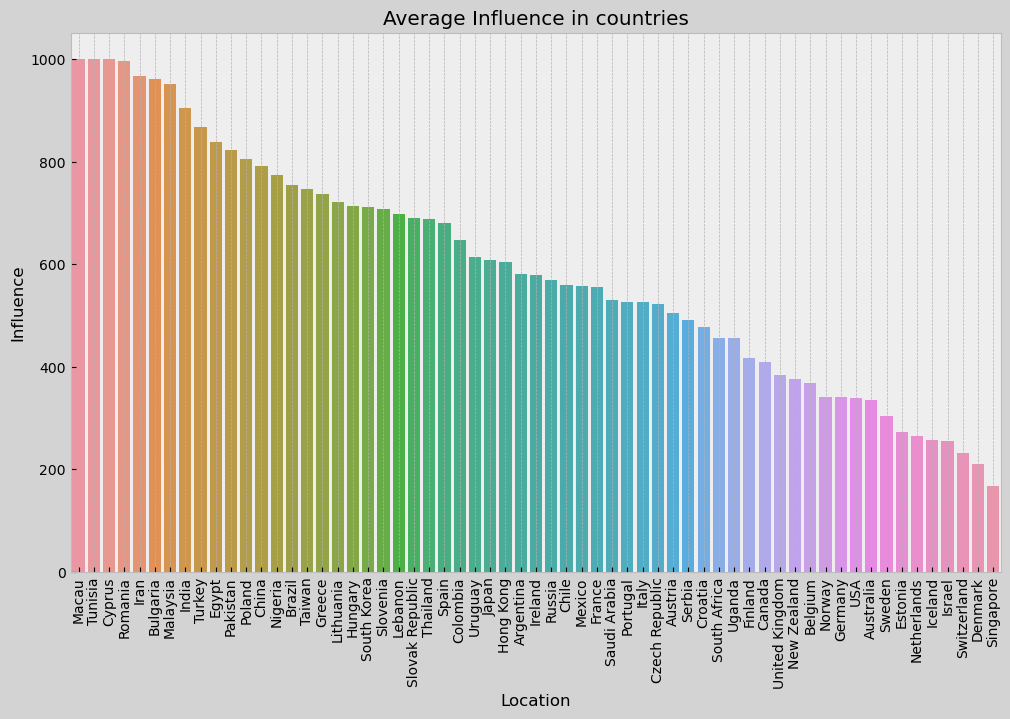

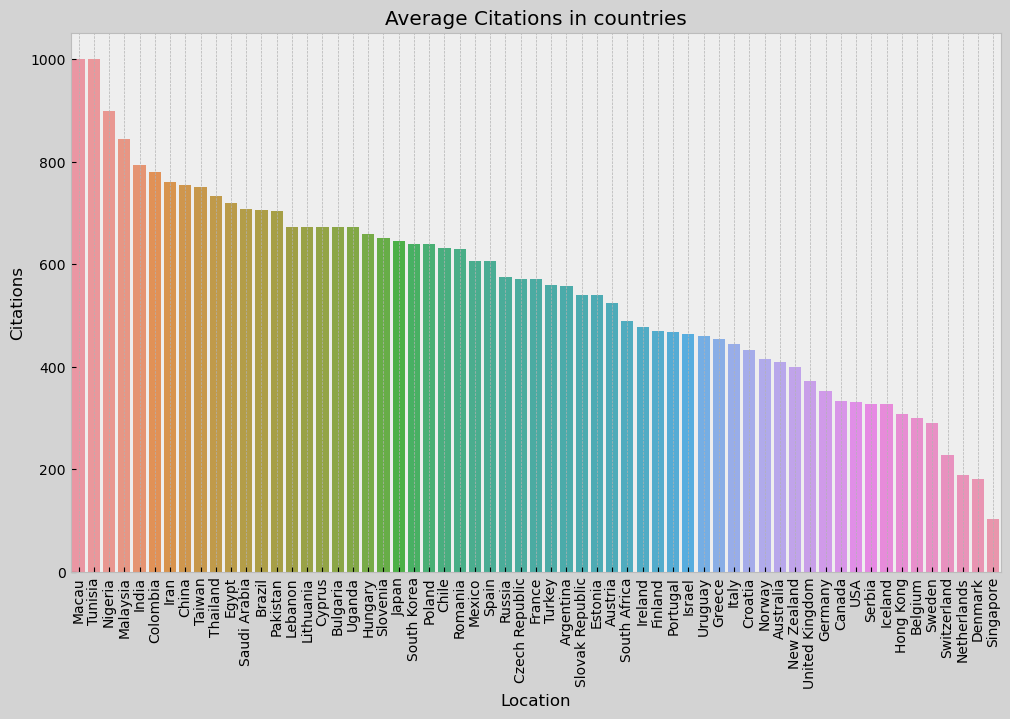

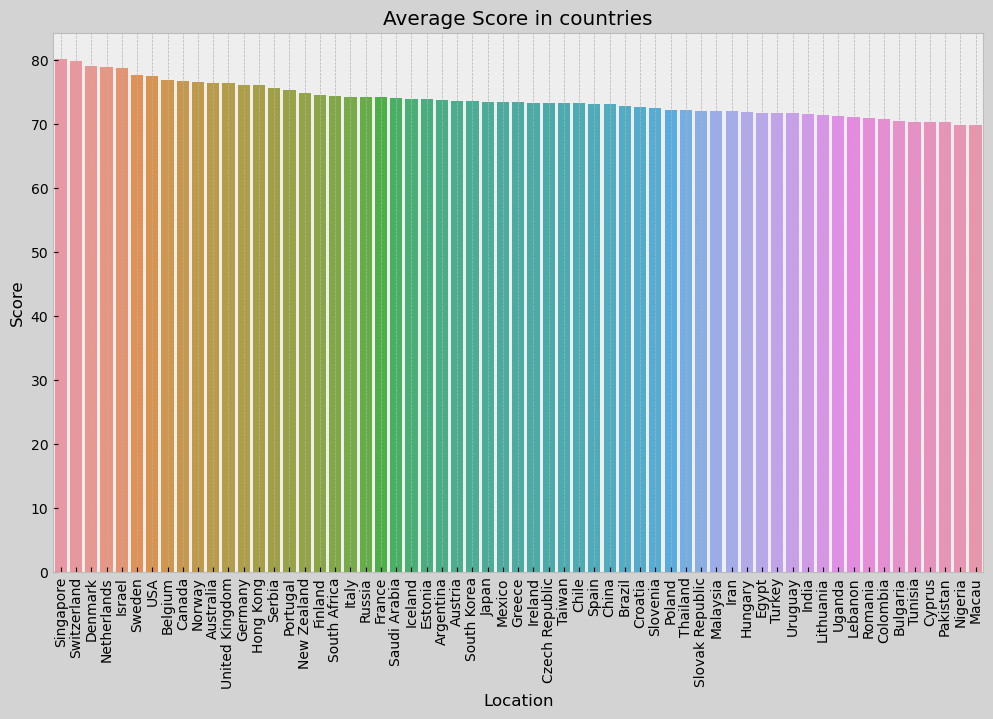

In [37]:
# count plot of average of columns
for col in df.columns:
    if (col != "Institution") and (col != "Location"):
        df_gb = df.groupby(['Location'])[col].mean().reset_index().sort_values(col , ascending = False)
        plt.figure (figsize = (12 , 7))
        ax = sns.barplot (x = "Location" , y = col , data = df_gb)
        plt.grid ()
        plt.title ("Average " + col + " in countries")
        plt.xticks (rotation = 90) 
        #plt.savefig ("C:Desktop/all locations vs " + col , orientation ='landscape' , bbox_inches ="tight" )
        plt.show()

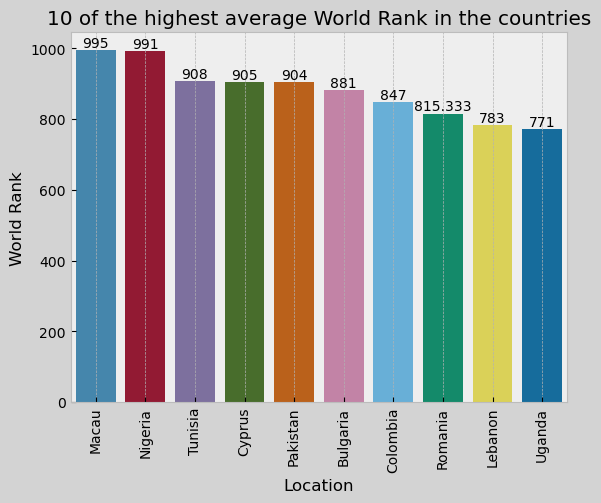

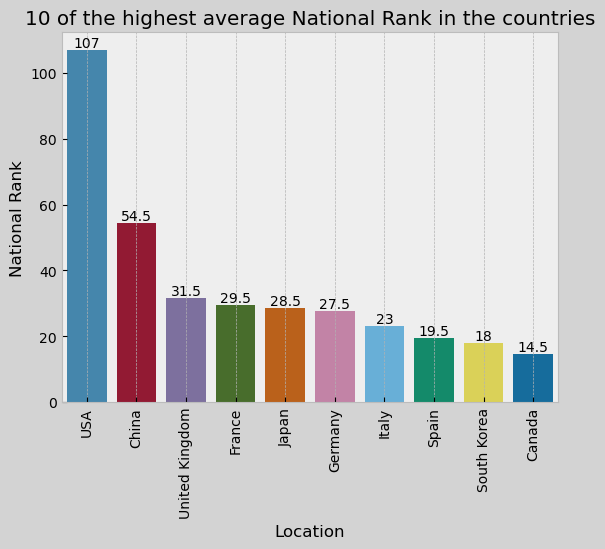

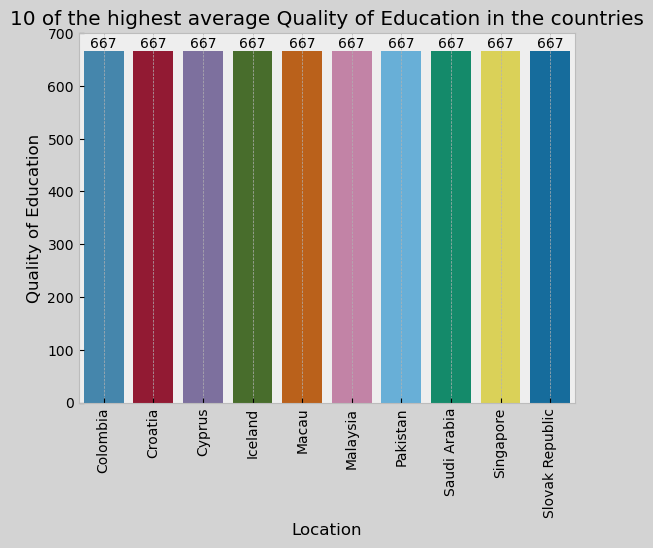

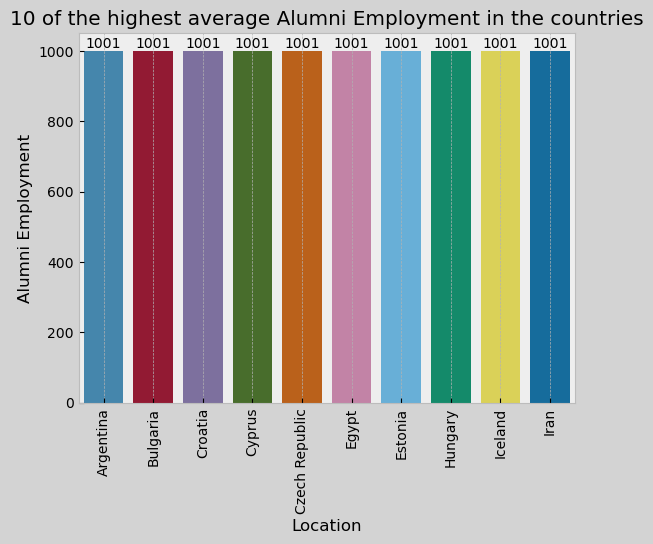

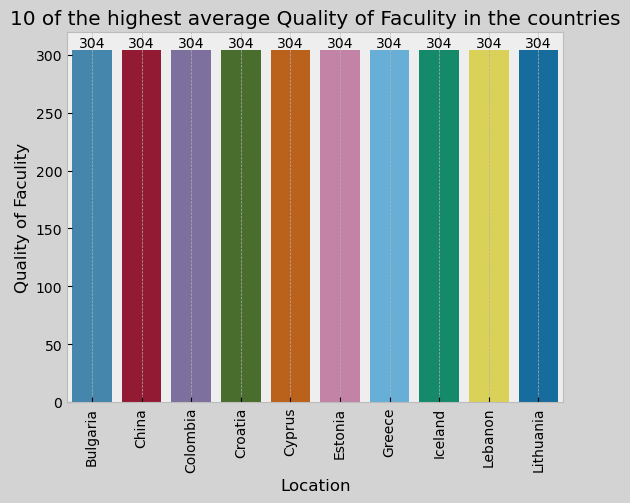

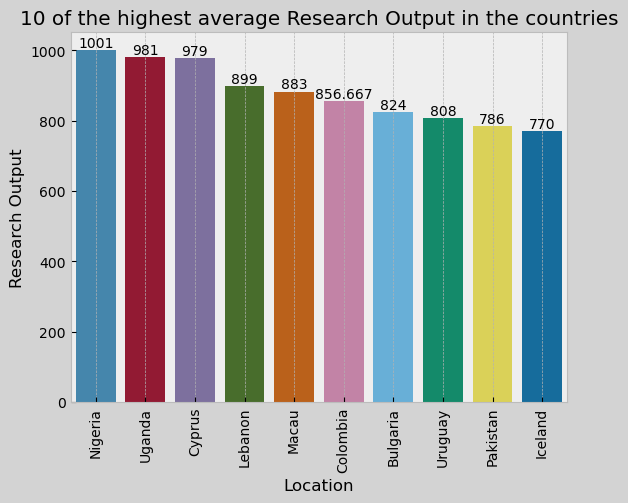

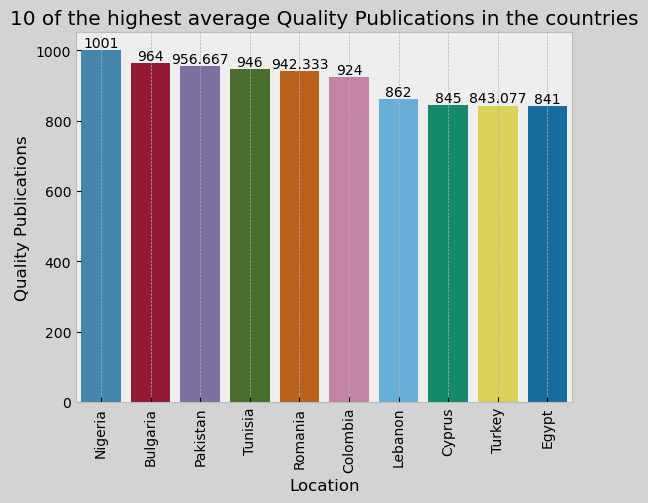

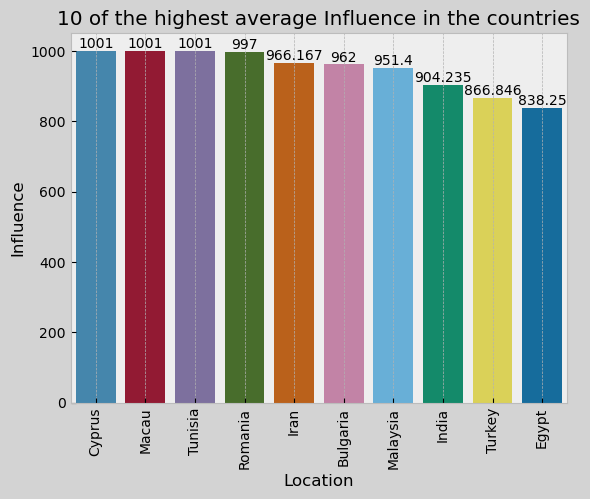

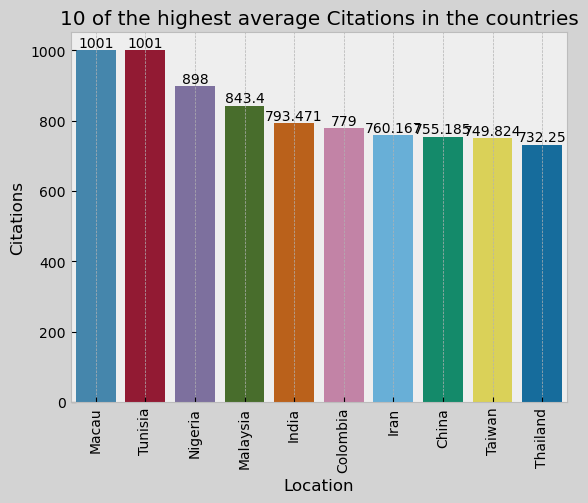

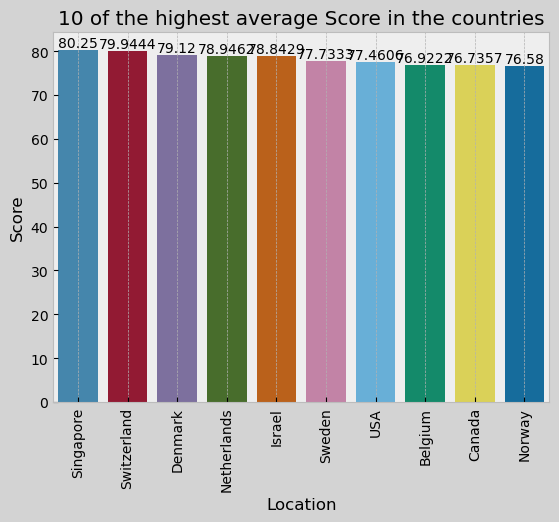

In [38]:
# 10 of the highest average of columns
for col in df.columns:
    if (col != "Institution") and (col != "Location") :
        df_gb = df.groupby(['Location'])[col].mean().nlargest(10).reset_index().sort_values(col , ascending = False)
        ax = sns.barplot (x = "Location" , y = col , data = df_gb)
        for label in ax.containers:
            ax.bar_label(label)
        plt.title ("10 of the highest average " + col + " in the countries")
        plt.grid ()
        plt.xticks (rotation = 90)
        #plt.savefig ("C:Desktop/10 of the highest average " + col + " in the countries" , orientation ='landscape' , bbox_inches ="tight" )
        plt.show ()

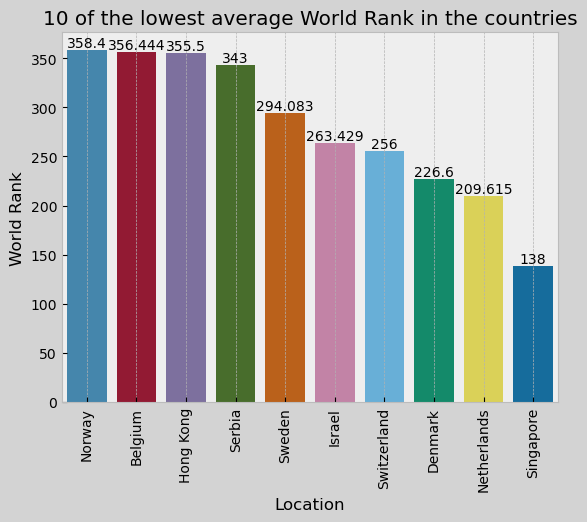

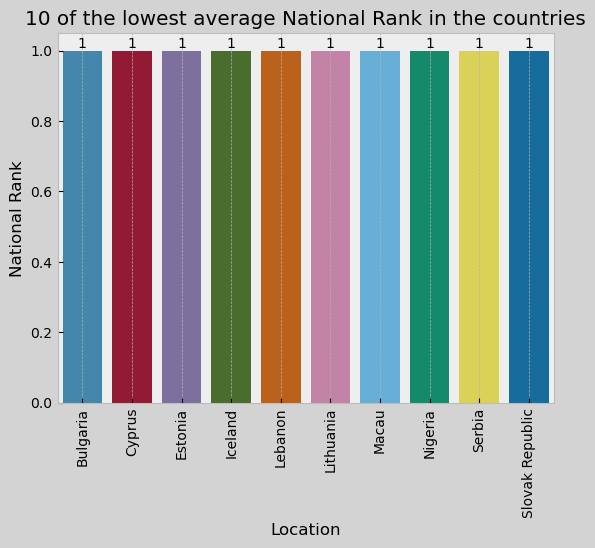

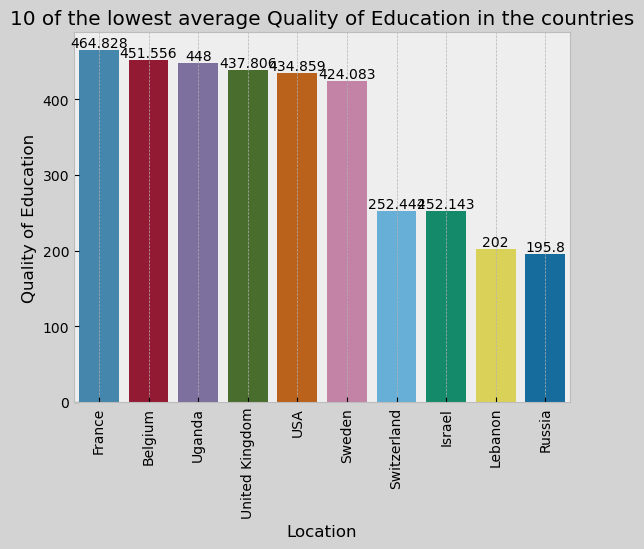

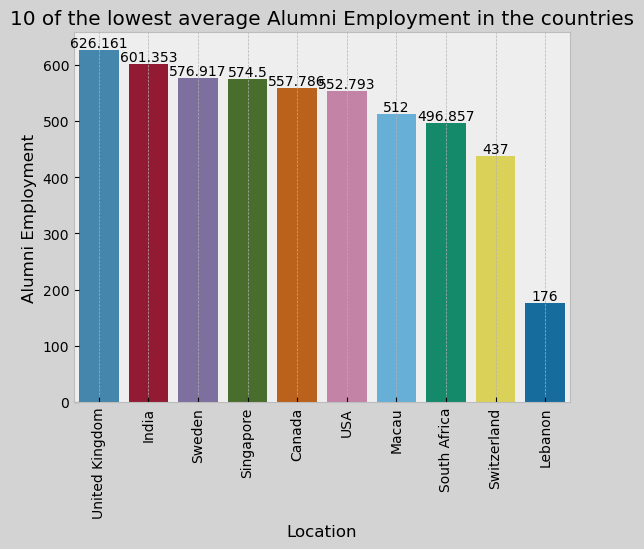

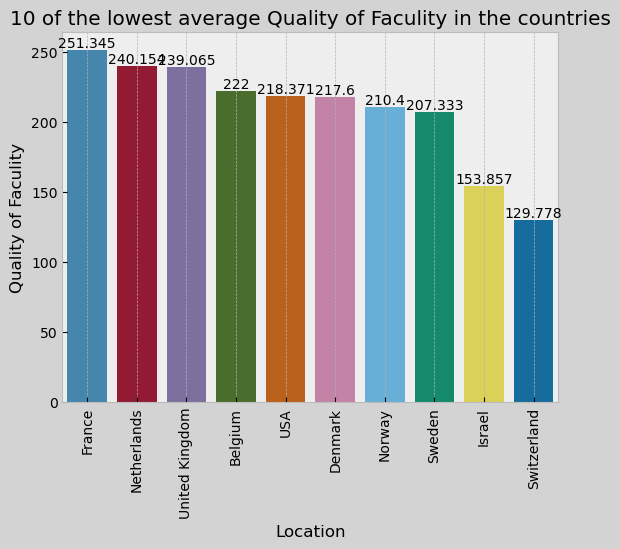

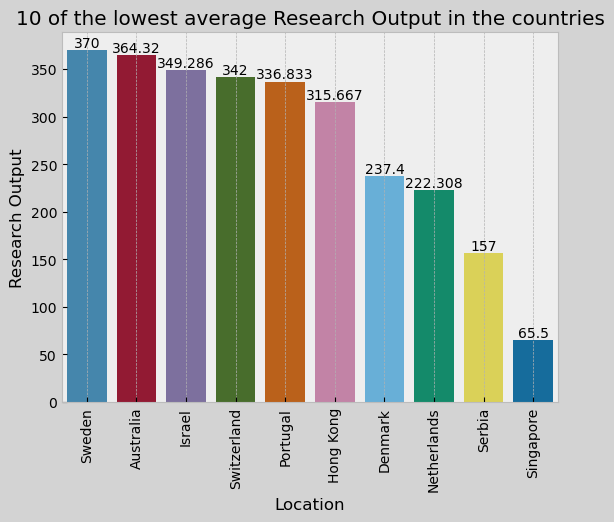

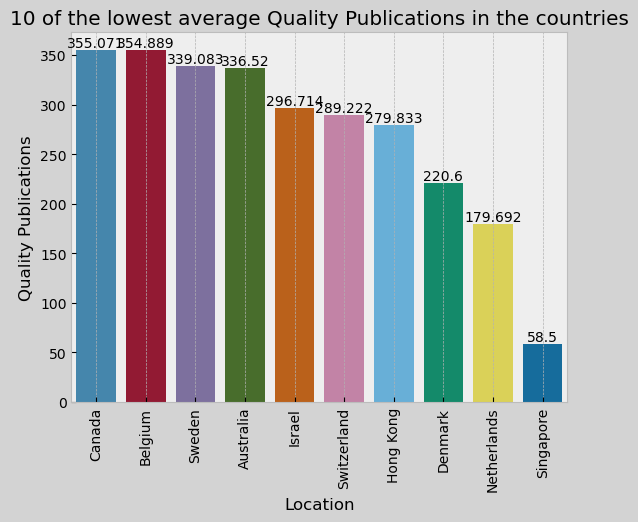

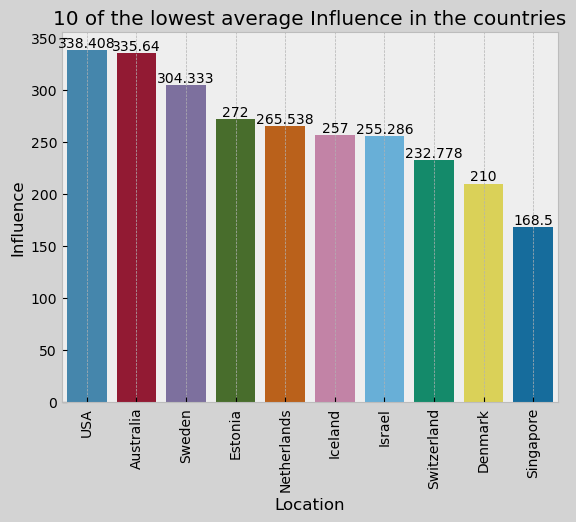

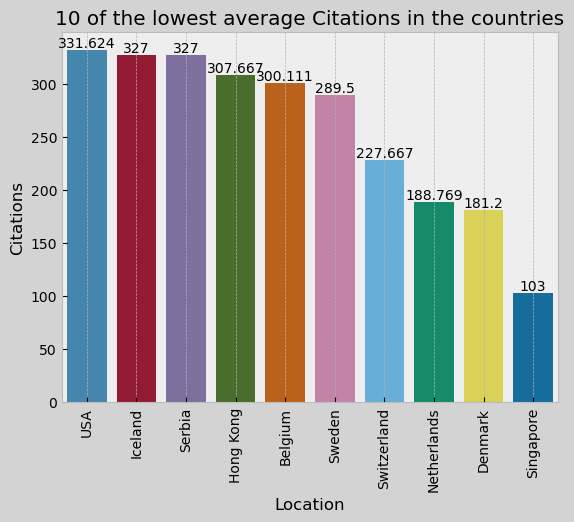

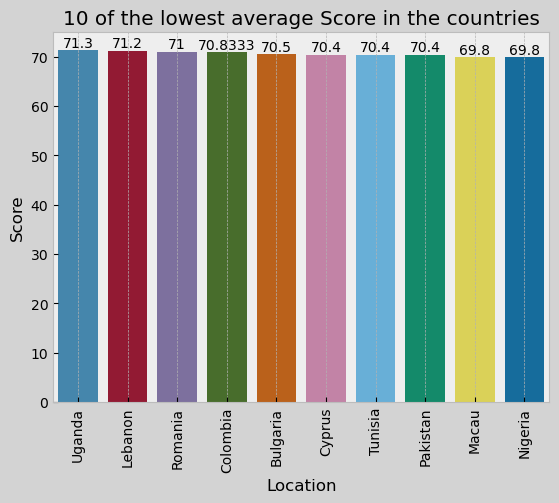

In [39]:
# 10 of the lowet average of columns
for col in df.columns:
    if (col != "Institution") and (col != "Location") :
        df_gb = df.groupby(['Location'])[col].mean().nsmallest(10).reset_index().sort_values(col , ascending = False)
        ax = sns.barplot (x = "Location" , y = col , data = df_gb)
        for label in ax.containers:
            ax.bar_label(label)
        plt.title ("10 of the lowest average " + col + " in the countries")
        plt.grid ()
        plt.xticks (rotation = 90)
        #plt.savefig ("C:Desktop/10 of the lowest average " + col + " in the countries" , orientation ='landscape' , bbox_inches ="tight" )
        plt.show ()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Box plots</div>

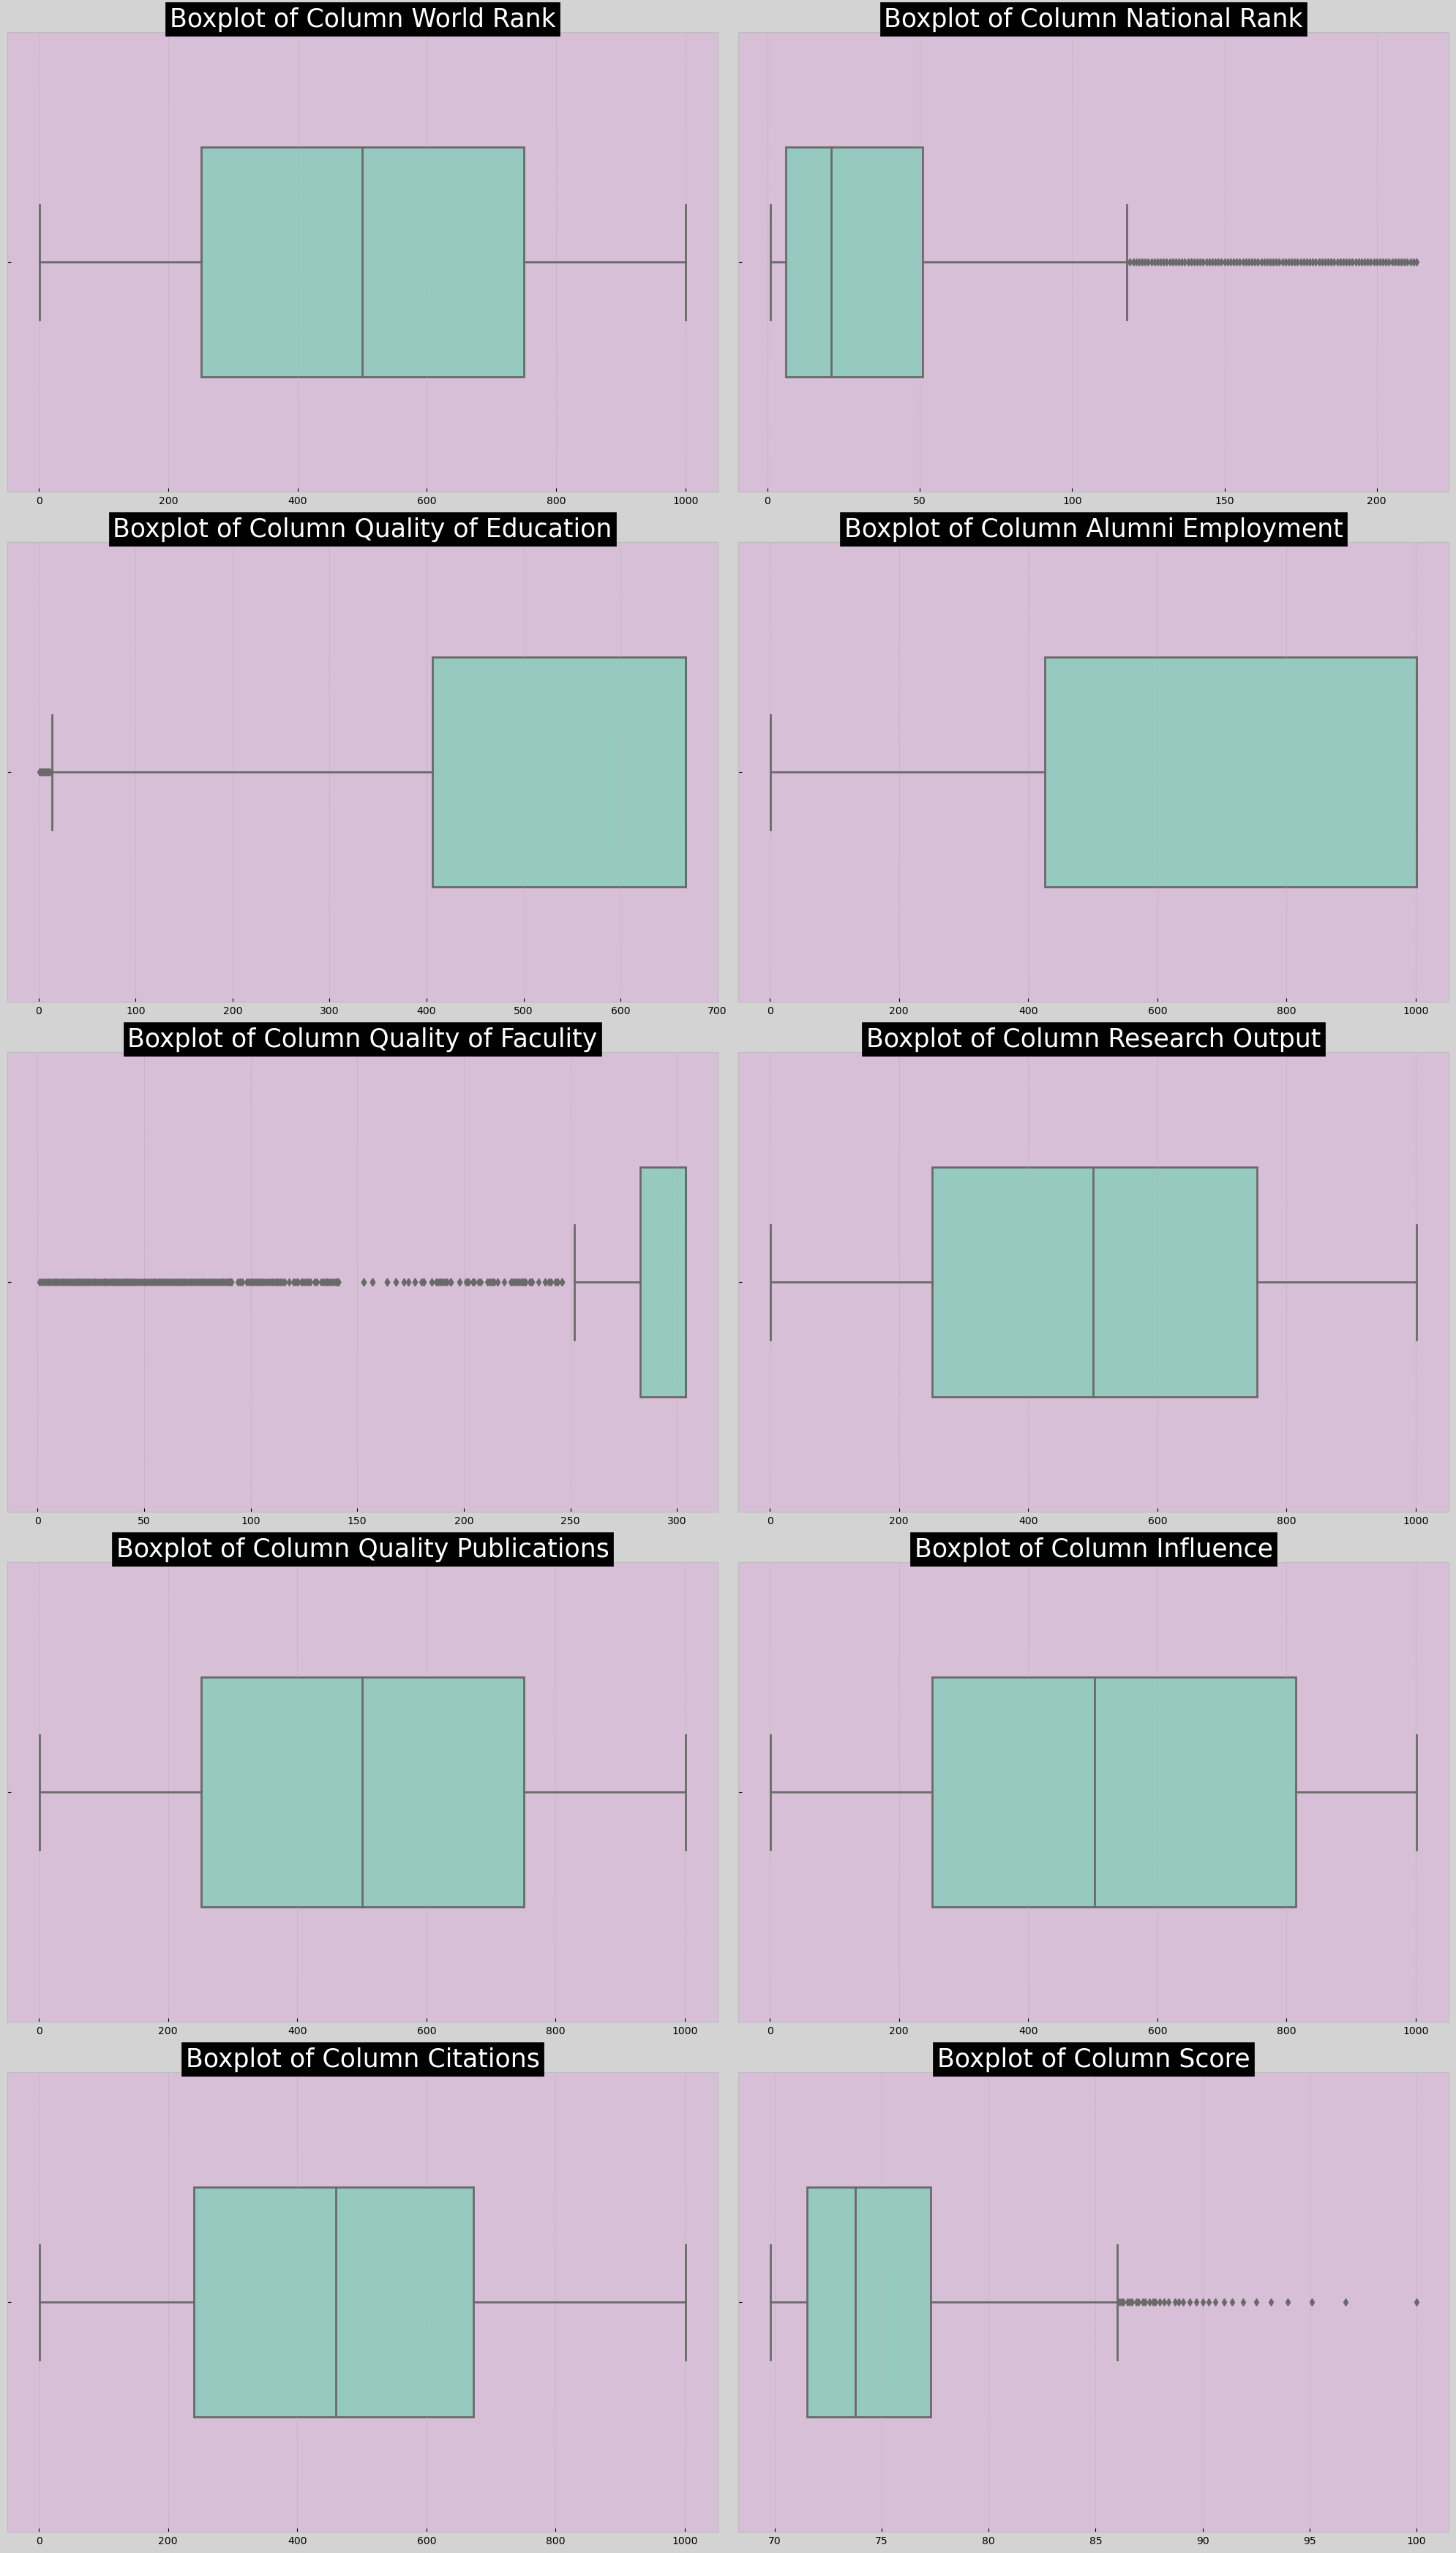

In [40]:
# a loop for box ploting numerical columns
columns_to_plot = df.drop (columns = ['Institution' , 'Location']).columns
n = len (columns_to_plot)
rows = n // 2 

fig , axs = plt.subplots (nrows = rows , ncols=2 , figsize = (20 , 7 * rows))
axs = axs.flatten () 

for ax , col in zip (axs , columns_to_plot):
    ax.set_facecolor ('thistle')
    ax.grid (True)
    box = sns.boxplot (x = col , data = df , palette = "Set3" , width = 0.5 , dodge = True , ax = ax)
    box.set_title ("Boxplot of Column " + col , fontsize = 25 , backgroundcolor = 'black', color = 'white')
    box.set (xlabel = None)
    
plt.tight_layout()
plt.show()

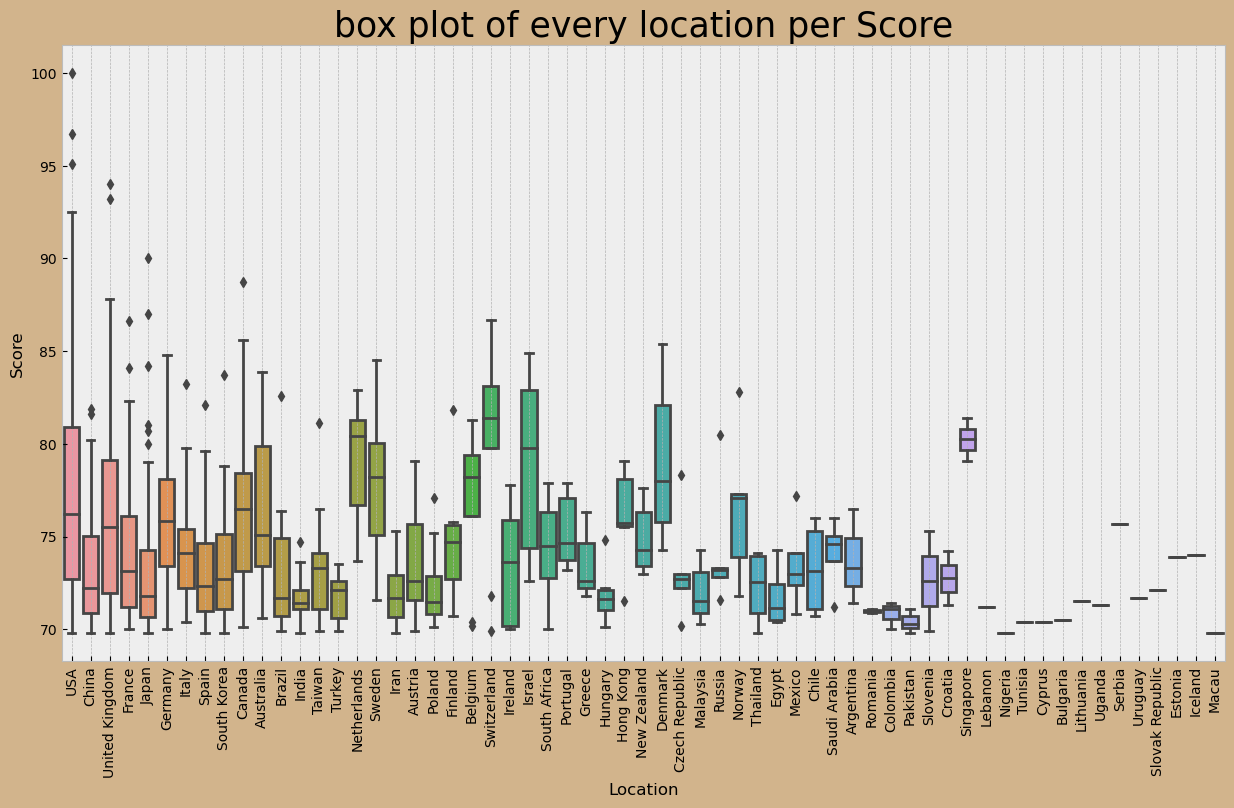

In [41]:
# box plot for score of every country in just one frame
fig = plt.figure (figsize = (15 , 8))
sns.boxplot (df ["Location"] , df ["Score"] , order = df ["Location"].value_counts().index )
fig.patch.set_facecolor('tan')
plt.title ("box plot of every location per Score" , fontsize = 25)
plt.xticks (rotation = 90)
plt.grid ()
plt.show ()

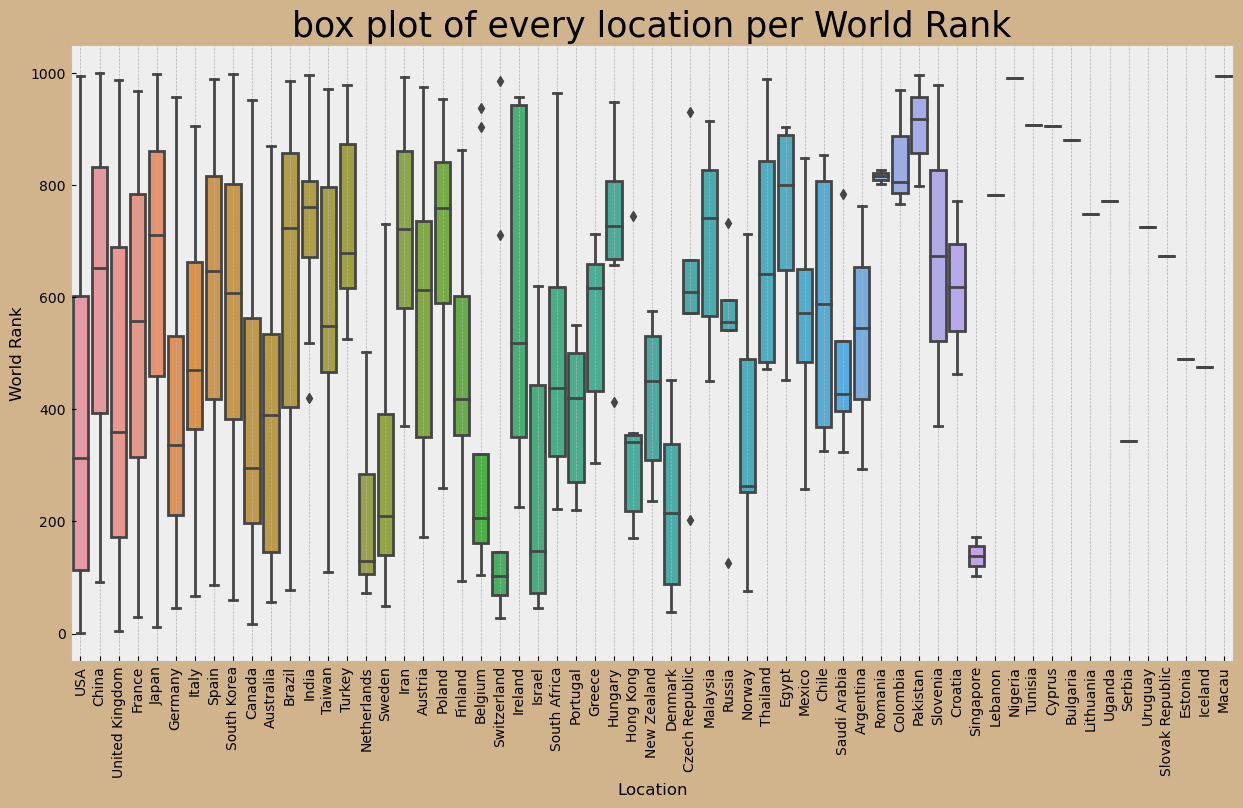

In [42]:
# box plot of work rank for every country
fig = plt.figure (figsize = (15 , 8))
sns.boxplot (df ["Location"] , df ['World Rank'] , order = df ["Location"].value_counts().index )
fig.patch.set_facecolor('tan')
plt.title ("box plot of every location per World Rank" , fontsize = 25)
plt.xticks (rotation = 90)
plt.grid ()
plt.show ()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">3D plots</div>

In [100]:
# Create a simple 3D scatter plot
fig = go.Figure (data = [go.Scatter3d (
    x = df ['Quality Publications'] , 
    y = df ["Research Output"] , 
    z = df ["Score"] ,
    mode = 'markers' ,
    marker = dict (
        size = 8 ,
        color = df ["Score"] ,   
        colorscale = 'Viridis',   
        opacity = 0.8
    )
)])

# Add labels to all axes
fig.update_layout (
    scene = dict (
        xaxis_title = 'Publications' ,
        yaxis_title = 'Research' ,
        zaxis_title = 'Score'
    ),
    width = 700 ,
    margin = dict (r = 20 , b = 10 , l = 10 , t = 10)
)

fig.show ()

In [101]:
# creating a beeter 3d scatter plot and putting the code in a fuction for using more comfortable with any 3 column that you want (good for Score as target)
def create_3d_plot (df , x_col , y_col , z_col):
    x_data = df [x_col]
    y_data = df [y_col]
    z_data = df [z_col]
    colors_data = df [z_col]  
    sizes_data = df [z_col] / 100  

    trace = go.Scatter3d (
        x = x_data ,
        y = y_data ,
        z = z_data ,
        mode = 'markers' ,
        marker = dict (
            sizemode = 'diameter',
            sizeref = 0.08 ,
            size = sizes_data ,  
            color = colors_data ,  
            colorscale = 'Viridis' ,
            colorbar = dict (thickness = 10 , title = z_col , len = 0.8) ,
            line = dict (color = 'rgb(255, 255, 255)')
        ) ,
        hovertext = df.index ,   
        hoverinfo = 'text'
    )

    data = [trace]

    layout = go.Layout (
        title = dict (text = '3D Scatter Plot' , y = .95 , x = 0.5 , xanchor = 'center' , yanchor = 'top' , font = dict (size = 24)) ,
        scene = dict (
            xaxis_title = x_col ,
            yaxis_title = y_col ,
            zaxis_title = z_col
        ) ,
        width = 1000 , 
        height = 800 ,
        margin = dict (r = 20 , b = 10 , l = 10 , t = 10)
    )

    fig = go.Figure (data = data , layout = layout)
    fig.show()

In [102]:
# exactly the upper function but this one is good for world rank as target)
def create_3d_plot1 (df , x_col , y_col , z_col):
    x_data = df [x_col]
    y_data = df [y_col]
    z_data = df [z_col]
    colors_data = df [z_col]  
    
    trace = go.Scatter3d (
        x = x_data ,
        y = y_data ,
        z = z_data ,
        mode = 'markers' ,
        marker = dict (
            sizemode = 'diameter' ,
            sizeref = 0.08 ,
            
            color = colors_data , 
            colorscale = 'Viridis' ,
            colorbar = dict (thickness = 10 , title = z_col , len = 0.8) ,
            line = dict (color = 'rgb(255, 255, 255)')
        ) ,
        hovertext = df.index ,   
        hoverinfo = 'text'
    )

    data = [trace]

    layout = go.Layout(
        title = dict (text = '3D Scatter Plot' , y = .95 , x = 0.5 , xanchor = 'center' , yanchor = 'top' , font = dict (size = 24)) ,
        scene = dict (
            xaxis_title = x_col ,
            yaxis_title = y_col ,
            zaxis_title = z_col
        ),
        width = 1000 , 
        height = 800 ,
        margin = dict (r = 20 , b = 10 , l = 10 , t = 10)
    )

    fig = go.Figure (data = data , layout = layout)
    fig.show ()

In [103]:
create_3d_plot (df , 'Quality Publications' , 'Research Output' , 'Score')

In [104]:
create_3d_plot(df , 'Research Output' , "Quality of Faculity" , 'Score')

In [105]:
create_3d_plot1 (df , 'Research Output' , "Alumni Employment" , 'World Rank')

In [106]:
create_3d_plot1 (df , 'Influence' , 'Citations' , 'World Rank')

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Choosing plots</div>

In [107]:
# making a plot that client choose the x
app = dash.Dash (__name__)
other_columns = df.columns.drop ('Score')
app.layout = html.Div ([
    dcc.Dropdown (
        id = 'columns-dropdown' ,
        options = [{'label' : i , 'value': i} for i in other_columns] ,
        value = other_columns [0]
    ),
    dcc.Graph (id = 'graph')
])

@app.callback (
    dash.dependencies.Output ('graph' , 'figure') ,
    [dash.dependencies.Input ('columns-dropdown' , 'value')]
)
def update_graph (selected_column):
    return {
        'data': [{
            'x': df [selected_column] ,
            'y': df ['Score'] ,
            'type': 'scatter' ,
            'mode': 'markers' ,
            'marker': {
                'size': 10 ,
                'opacity': 0.5 ,
                'line': {'width': 0.5 , 'color' : 'white'}
            },
            'name': selected_column
        }],
        'layout': go.Layout (
            xaxis = {'title': selected_column},
            yaxis = {'title': 'Score'},
            margin = {'l': 40 , 'b': 40 , 't': 10 , 'r': 10},
            hovermode = 'closest'
        )
    }

if __name__ == '__main__':
    app.run_server (debug = True , port = 8080)

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Pie plots</div>

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">making a pie plot and put all contries which have less than 15 universities in our data frame in a 'other' title</div>

In [108]:
dfLocNum = df.groupby ("Location").size().reset_index()  # groupby df by location 

In [109]:
dfOther = dfLocNum [dfLocNum [0] < 15 ]                  # spliting contries which have less than 15 universities

In [110]:
for col1 in list (dfOther.Location):                     # replace their value with 'other'   
    dfOther = dfOther.replace ([col1] , "other")

In [111]:
dfTop = dfLocNum [dfLocNum [0] >= 15 ]                  # spliting contries which have equal or more than 15 universities

In [112]:
dfMain = dfTop.append (dfOther)                         # append 'other' and make our main data frame

In [113]:
dfMain.rename (columns = {0 : "number of institutions"} , inplace = True)  # changing a name of column

In [114]:
px.pie (dfMain , values = "number of institutions" , names = "Location")        # a simple pie plot

In [115]:
# make it better 
ab = px.pie(dfMain, values = "number of institutions", names="Location")
ab.update_traces (hole = .4 , hoverinfo = "label+percent+name" )
ab.update_layout(title = {
    "text" : "Institution per country" , 
    'y':0.98,  
    'x':0.44,
    'xanchor': 'center',
    'yanchor': 'top'} ,
    font = dict (size = 16) , 
    margin = dict(l = 45 , r = 45 , t = 45 , b = 45),
    paper_bgcolor = "LightSteelBlue")

In [116]:
# a pie plot for average of score in countries 
# making a title 'other' for less than 75 average score 
# you can choose to not see other title for better visualization
dfScore = df.groupby(['Location'])["Score"].mean().reset_index().sort_values("Score" , ascending = False)
dfLowScore = dfScore [dfScore ["Score"] < 75 ]

for val in list (dfLowScore.Location):
    dfLowScore = dfLowScore.replace ([val] , "other")
    
dfHighScore = dfScore [dfScore ["Score"] >= 75]
dfAllScore = dfHighScore.append (dfLowScore)

ab1 = px.pie(dfAllScore, values = "Score", names="Location")
ab1.update_traces (hole = .4 , hoverinfo = "label+percent+name" )
ab1.update_layout(title = {
    "text" : "Score per country" , 
    'y':0.98,  
    'x':0.44,
    'xanchor': 'center',
    'yanchor': 'top'} ,
    font = dict (size = 16) , 
    margin=dict(l=45, r=45, t=45, b=45),
    paper_bgcolor="LightSteelBlue",
                )

In [117]:
# kind of pie plot with plotly for 30 top universities and their continents
dfRank = dfL [dfL ["World Rank"] <= 30]
ax = px.sunburst(dfRank,
                  path=['Continent', 'Location','Institution']
                 )
ax.update_layout(title = {
    "text" : "top 30 universities" , 
    'y':0.98,  
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} ,
    font = dict (size = 16) , 
    margin=dict(l=45, r=45, t=45, b=45),
    paper_bgcolor="LightSteelBlue",
                )
ax.show()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Map plots</div>

In [118]:
dfiNum = pd.DataFrame (dfL [['Location','ISO_Loc']].value_counts ().reset_index ()) # grouo by data frame by location and iso for number of institution
dfiNum.rename (columns = {0 : 'number_of_institutions'} , inplace=True)
dfiNum

Location ISO_Loc  number_of_institutions
0    United States     USA                     213
1            China     CHN                     108
2   United Kingdom     GBR                      62
3           France     FRA                      58
4            Japan     JPN                      56
..             ...     ...                     ...
56         Iceland     ISL                       1
57         Estonia     EST                       1
58          Cyprus     CYP                       1
59        Bulgaria     BGR                       1
60         Uruguay     URY                       1

[61 rows x 3 columns]

In [119]:
# making map plot with plotly  for institutions per country 
ax = px.choropleth (dfiNum ,
                       locations="ISO_Loc",
                       color='number_of_institutions',
                       hover_name="Location", 
                        )
ax.update_layout(title = {
    "text" : "institutions per country" , 
    'y':0.98,  
    'x':0.45,
    'xanchor': 'center',
    'yanchor': 'top'} ,
    font = dict (size = 16) , 
    margin=dict(l=45, r=45, t=45, b=45),
    paper_bgcolor="LightSteelBlue",
                )
ax.show()

In [120]:
df_gb1 = dfL.groupby(by = ['Location' , 'ISO_Loc']).mean().reset_index() # groupby data all of the frame 

In [121]:
# map plot for average score in countries
ax = px.choropleth (df_gb1 ,
                       locations="ISO_Loc",
                       color='Score',
                       hover_name="Location", 
                        )
ax.update_layout(title = {
    "text" : "mean score in countries" , 
    'y':0.98,  
    'x':0.45,
    'xanchor': 'center',
    'yanchor': 'top'} ,
    font = dict (size = 16) , 
    margin=dict(l=45, r=45, t=45, b=45),
    paper_bgcolor="LightSteelBlue",
                )
ax.show()

In [122]:
# average work rank in countries
ax = px.choropleth (df_gb1 ,
                       locations="ISO_Loc",
                       color='World Rank',
                       hover_name="Location", 
                        )
ax.update_layout(title = {
    "text" : "mean World Rank in countries" , 
    'y':0.98,  
    'x':0.45,
    'xanchor': 'center',
    'yanchor': 'top'} ,
    font = dict (size = 16) , 
    margin=dict(l=45, r=45, t=45, b=45),
    paper_bgcolor="LightSteelBlue",
                )
ax.show()

In [123]:
# Drawing a map to see the location of each university on it
fig = px.scatter_mapbox(dfL, lat='Latitude', lon='Longitude', hover_name='Institution',
                        hover_data=["World Rank", "Score"],zoom=5,
                        mapbox_style="open-street-map")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [124]:
# 100 top universities (by world rank) on the map
dfRank2 = dfL [dfL ["World Rank"] <= 100]
fig = px.scatter_mapbox(dfRank2, lat='Latitude', lon='Longitude', hover_name='Institution',
                        hover_data=["Location" , "World Rank", "Score"],zoom=5,
                        mapbox_style="open-street-map")

fig.update_layout(
    title={
        'text': "top 100 universities", # your title here
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict( # Define font
            size=40, # Set font size here
            family="Courier New, monospace",  # Define font family
        ),
    },
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 170%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Heat map</div>

<AxesSubplot:>

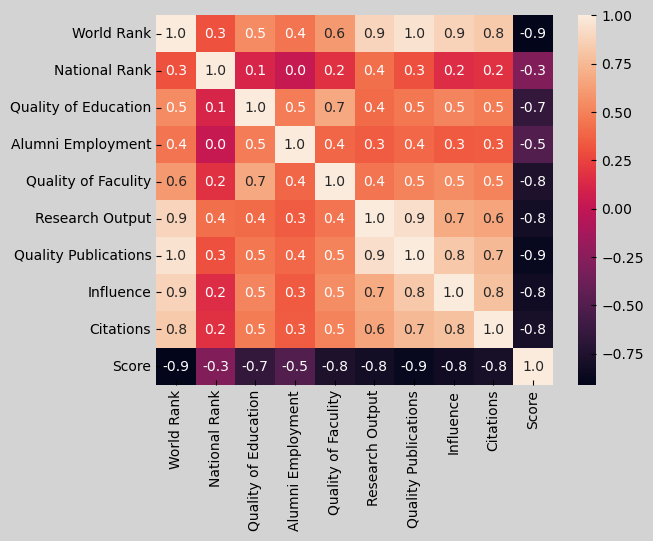

In [125]:
# correlation of data frame for understanding the relation of features to one another
sns.heatmap(df.corr() , annot=True , fmt=".1f")
#plt.savefig ("C:Desktop/heatmap" , orientation ='landscape' , bbox_inches ="tight" )

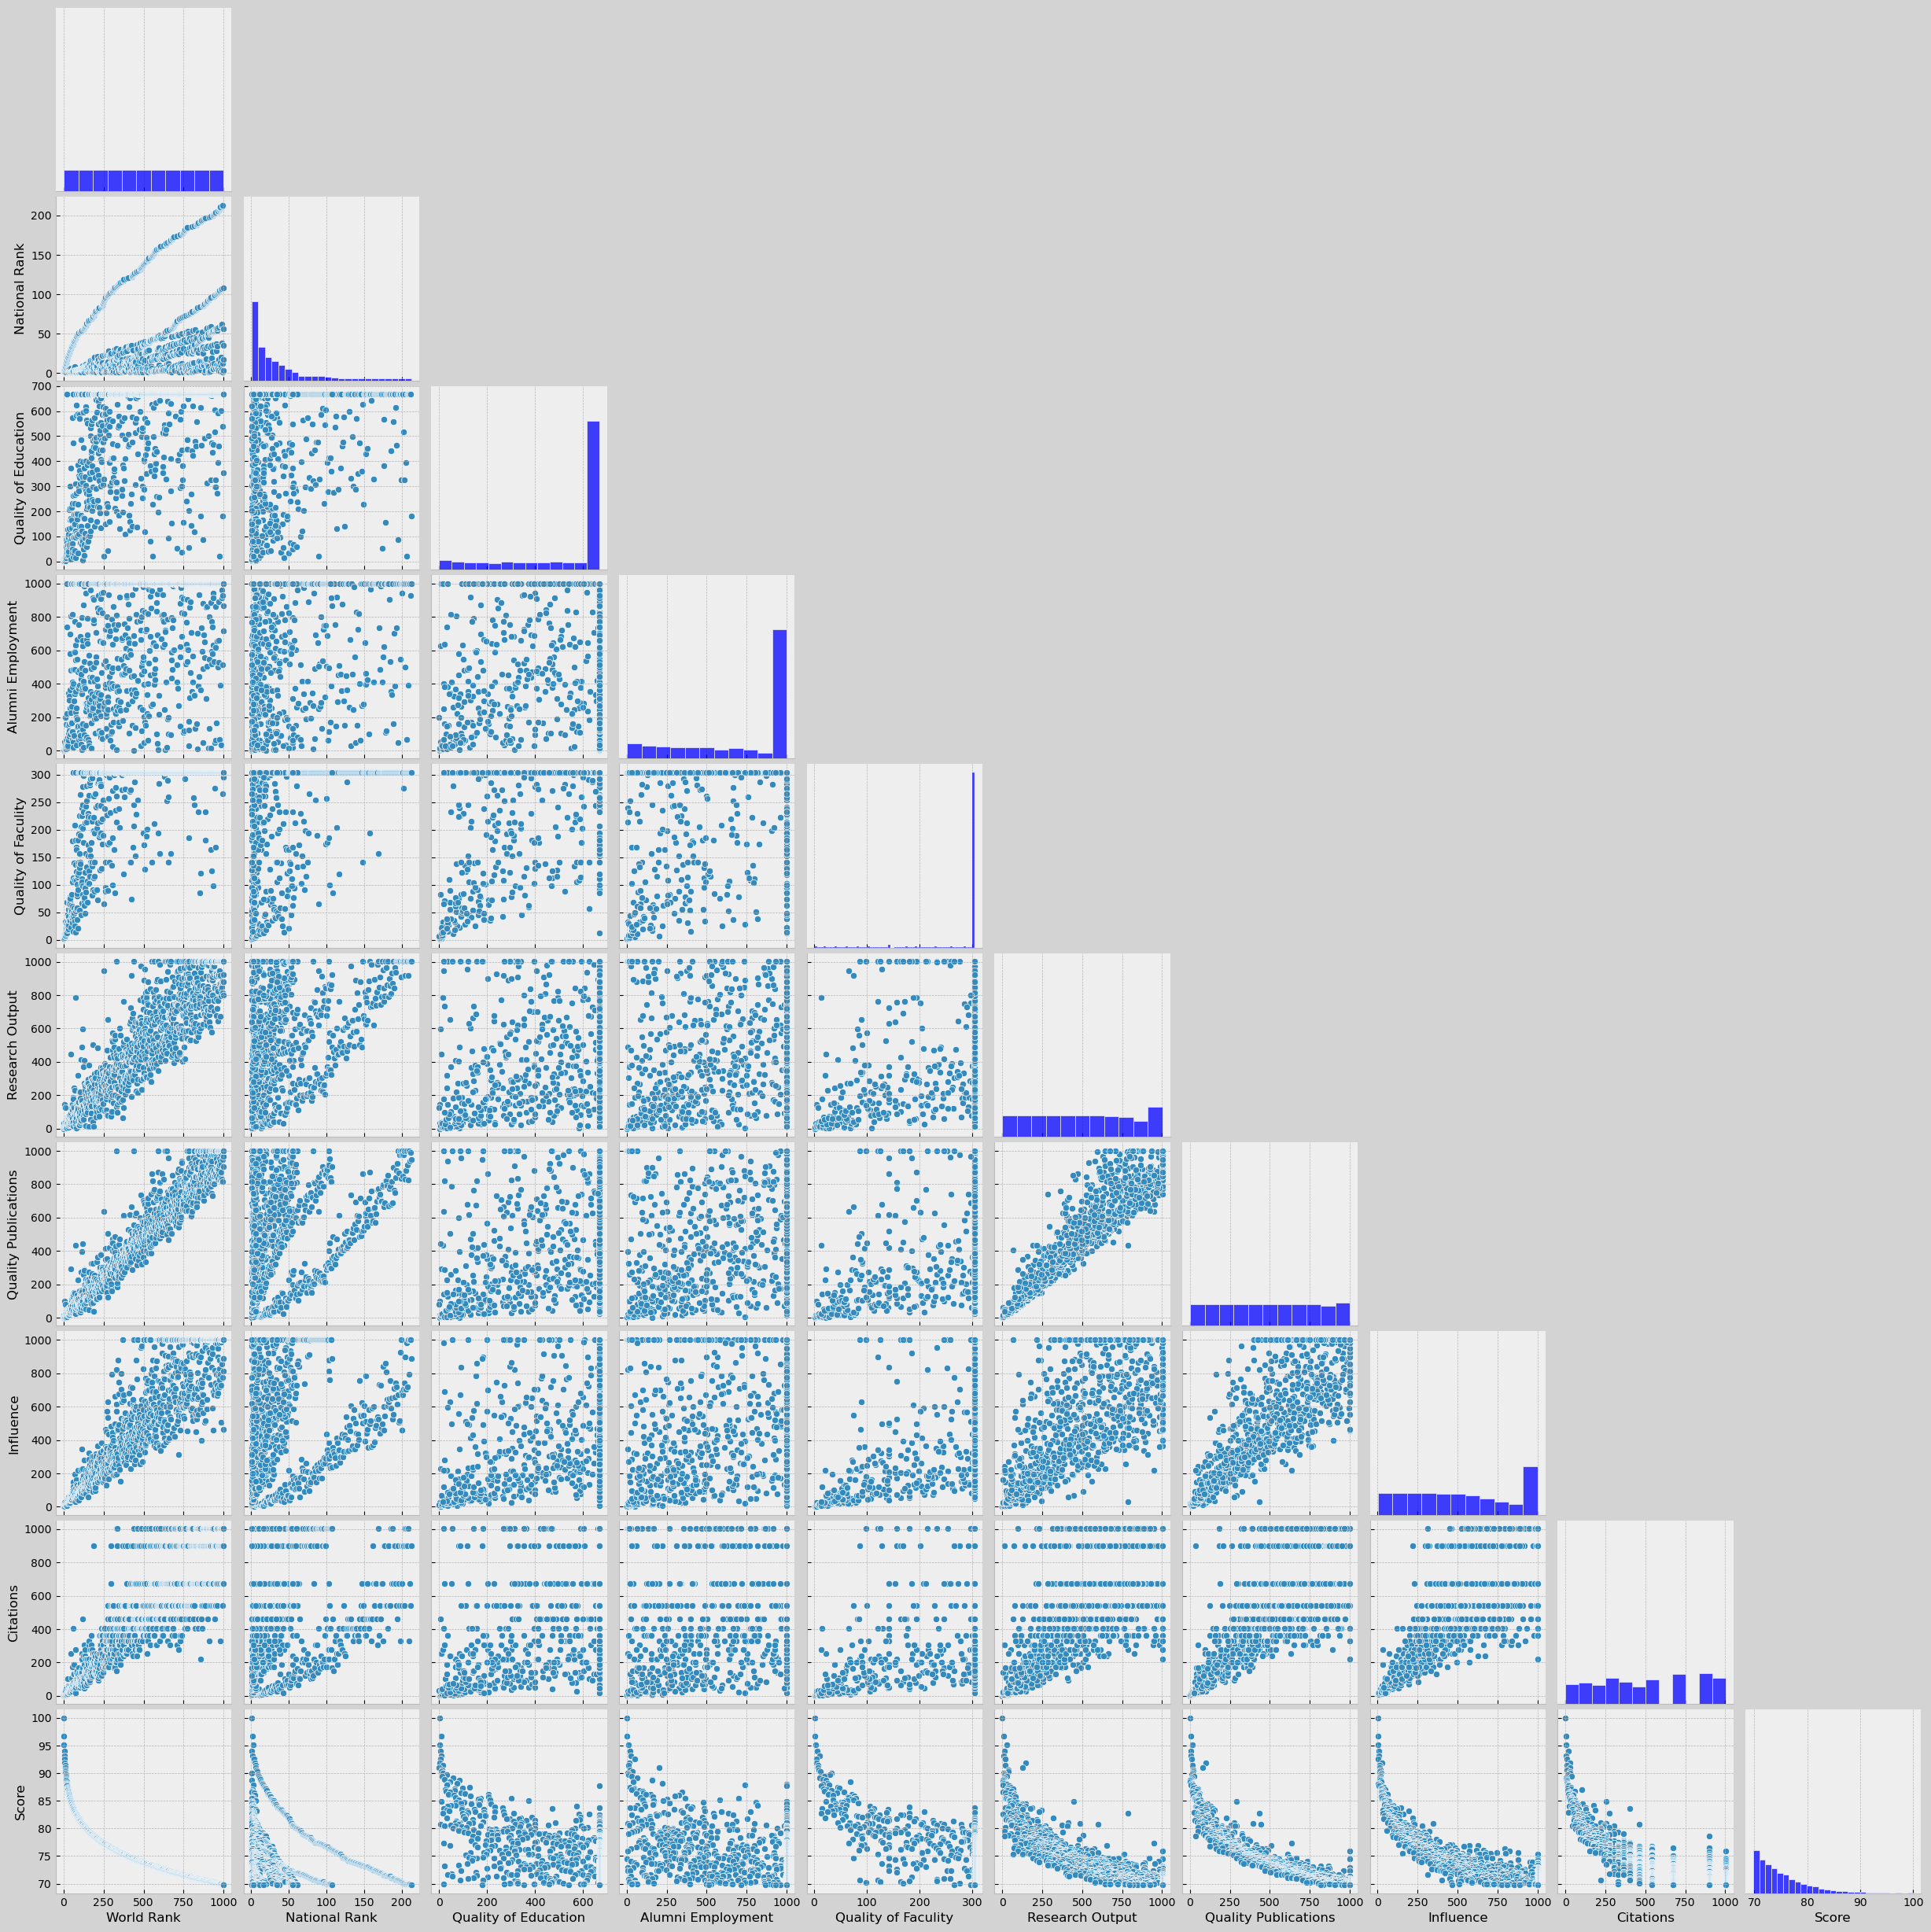

In [126]:
# a pair plot that we can have a quick look at the disturbution and relations between our features
columns_to_plot = list (df.columns)
sns.pairplot(df [columns_to_plot] , corner=True)

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">I hope it was helpful to you</div>